In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv("framingham.csv",na_values="NA")

In [99]:
df.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [101]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Removing Duplicate if any

In [102]:
df.shape

(4238, 16)

In [103]:
df = df.drop_duplicates()
df.shape

(4238, 16)

Handling Missing Values

In [104]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [105]:
df.corr()

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017352       0.197596    0.317930   
age             -0.028979  1.000000  -0.165883      -0.213748   -0.192791   
education        0.017352 -0.165883   1.000000       0.018532    0.008085   
currentSmoker    0.197596 -0.213748   0.018532       1.000000    0.769690   
cigsPerDay       0.317930 -0.192791   0.008085       0.769690    1.000000   
BPMeds          -0.052506  0.122995  -0.010815      -0.048938   -0.046134   
prevalentStroke -0.004546  0.057655  -0.035112      -0.032988   -0.032707   
prevalentHyp     0.005313  0.307194  -0.081970      -0.103260   -0.066146   
diabetes         0.015708  0.101258  -0.038680      -0.044295   -0.037067   
totChol         -0.070322  0.262131  -0.023115      -0.046562   -0.026320   
sysBP           -0.035989  0.394302  -0.129631      -0.130230   -0.088780   
diaBP            0.057933  0.206104  -0.062316      -0.107746   -0.056632   
BMI              0.081672  0.135800  -0.137504      -0.167650   -0.092856   
heartRate       -0.116620 -0.012823  -0.054206       0.062356    0.075157   
glucose          0.006083  0.122256  -0.035721      -0.056826   -0.058960   
TenYearCHD       0.088428  0.225256  -0.054059       0.019456    0.057884   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052506        -0.004546      0.005313  0.015708 -0.070322   
age              0.122995         0.057655      0.307194  0.101258  0.262131   
education       -0.010815        -0.035112     -0.081970 -0.038680 -0.023115   
currentSmoker   -0.048938        -0.032988     -0.103260 -0.044295 -0.046562   
cigsPerDay      -0.046134        -0.032707     -0.066146 -0.037067 -0.026320   
BPMeds           1.000000         0.117365      0.261187  0.052047  0.080558   
prevalentStroke  0.117365         1.000000      0.074830  0.006949  0.000067   
prevalentHyp     0.261187         0.074830      1.000000  0.077808  0.163993   
diabetes         0.052047         0.006949      0.077808  1.000000  0.040278   
totChol          0.080558         0.000067      0.163993  0.040278  1.000000   
sysBP            0.254219         0.057009      0.696755  0.111283  0.208908   
diaBP            0.194227         0.045190      0.615751  0.050329  0.165182   
BMI              0.100668         0.025891      0.301318  0.087036  0.115767   
heartRate        0.015233        -0.017676      0.147261  0.048994  0.091125   
glucose          0.051176         0.018431      0.086834  0.617627  0.046408   
TenYearCHD       0.087489         0.061810      0.177603  0.097317  0.082184   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035989  0.057933  0.081672  -0.116620  0.006083    0.088428  
age              0.394302  0.206104  0.135800  -0.012823  0.122256    0.225256  
education       -0.129631 -0.062316 -0.137504  -0.054206 -0.035721   -0.054059  
currentSmoker   -0.130230 -0.107746 -0.167650   0.062356 -0.056826    0.019456  
cigsPerDay      -0.088780 -0.056632 -0.092856   0.075157 -0.058960    0.057884  
BPMeds           0.254219  0.194227  0.100668   0.015233  0.051176    0.087489  
prevalentStroke  0.057009  0.045190  0.025891  -0.017676  0.018431    0.061810  
prevalentHyp     0.696755  0.615751  0.301318   0.147261  0.086834    0.177603  
diabetes         0.111283  0.050329  0.087036   0.048994  0.617627    0.097317  
totChol          0.208908  0.165182  0.115767   0.091125  0.046408    0.082184  
sysBP            1.000000  0.784002  0.326981   0.182246  0.140621    0.216429  
diaBP            0.784002  1.000000  0.377588   0.181255  0.061231    0.145299  
BMI              0.326981  0.377588  1.000000   0.067678  0.087377    0.075192  
heartRate        0.182246  0.181255  0.067678   1.000000  0.094500    0.022913  
glucose          0.140621  0.061231  0.087377   0.094500  1.000000    0.125544  
TenYearCHD       0.216429  0.145299  0.075192   0.0229

Using mean and mode for filling na values  ie df

In [106]:
df = df.copy()

In [107]:
# Since It is a categorical column
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0]) 

In [108]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())


In [109]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

In [110]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

df_imputated = imputer.fit_transform(df)

df = pd.DataFrame(df_imputated, columns=df.columns)


In [111]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [112]:
correlation = df.corr()

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   float64
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   float64
dtypes: float64(16)
memory usage: 529.9 KB


<Axes: >

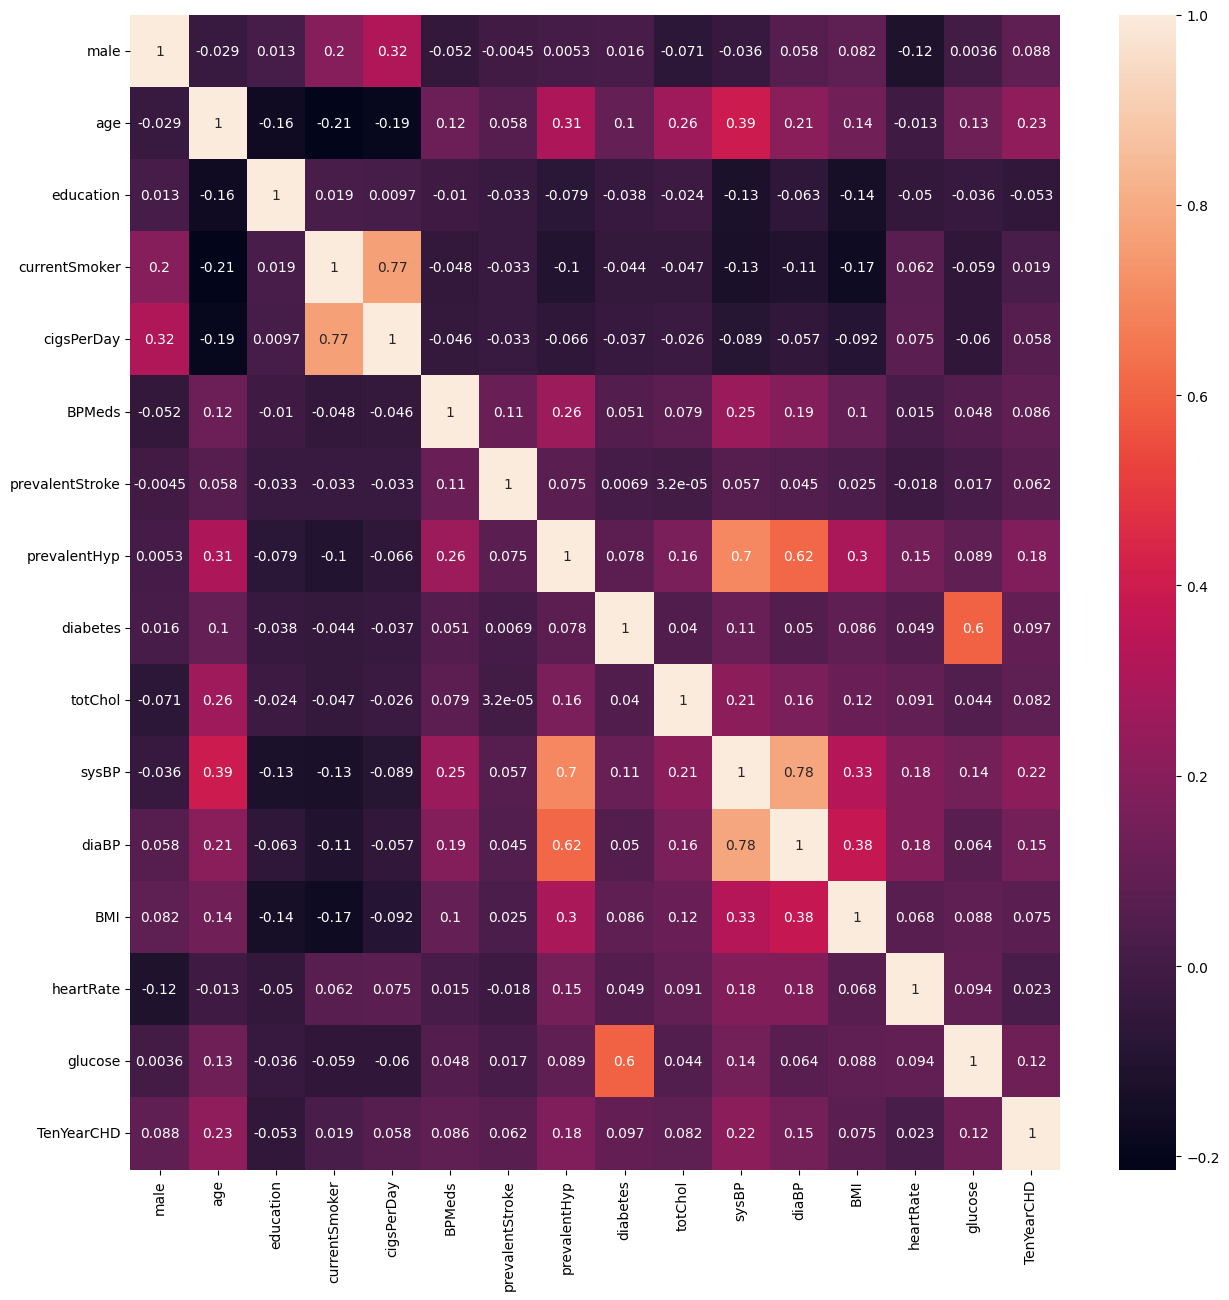

In [114]:
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot=True)

EDA

In [115]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.954696       0.494101     9.005427   
std       0.495022     8.572160     1.018510       0.500024    11.886001   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4238.000000      4238.000000   4238.000000  4238.000000  4238.000000   
mean      0.029259         0.005899      0.310524     0.025720   236.741812   
std       0.168552         0.076587      0.462763     0.158316    44.366453   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.893723   
std      22.038097    11.910850     4.070953    12.025177    22.999298   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    72.000000   
50%     128.000000    82.000000    25.410000    75.000000    78.000000   
75%     144.000000    89.875000    28.037500    83.000000    86.200000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

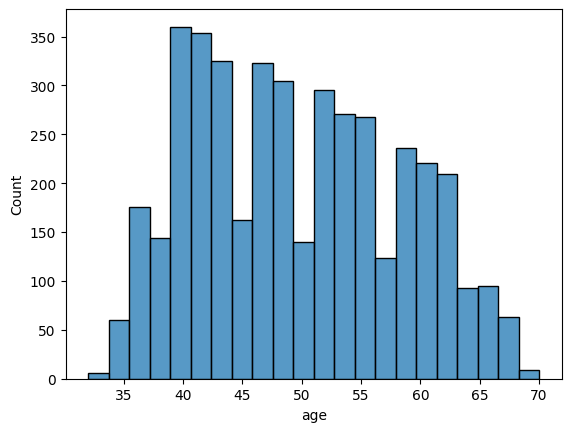

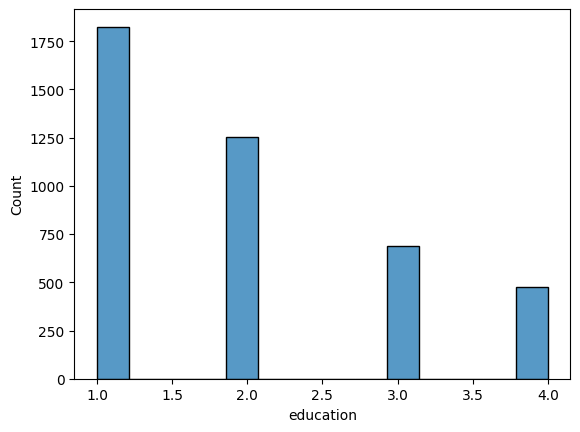

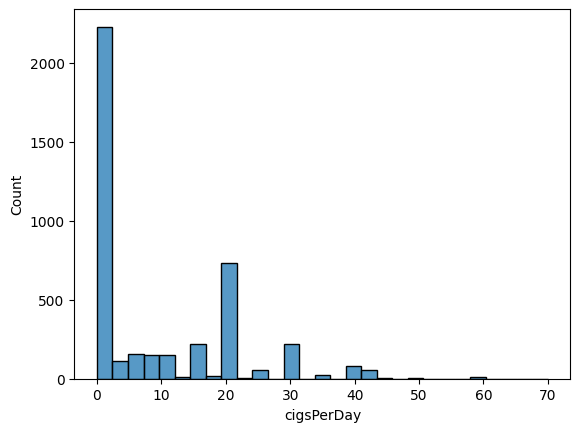

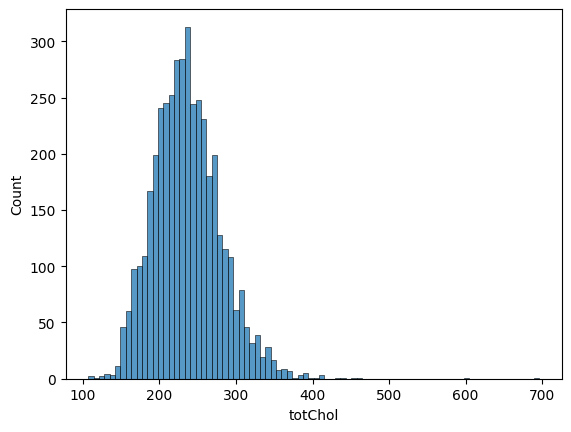

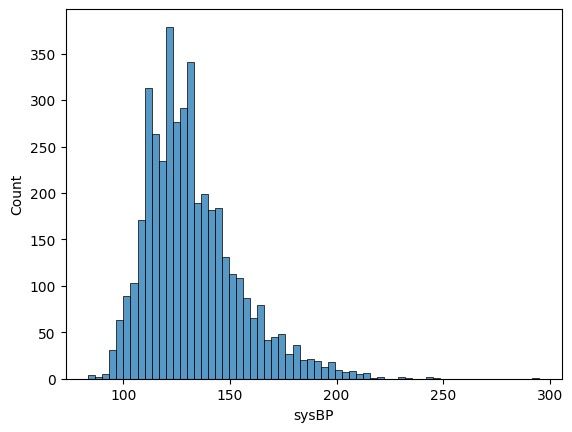

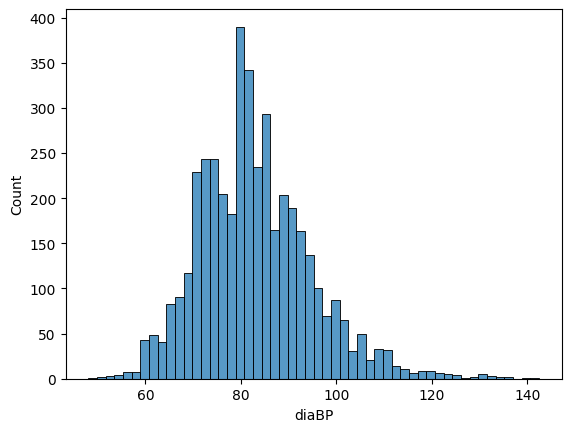

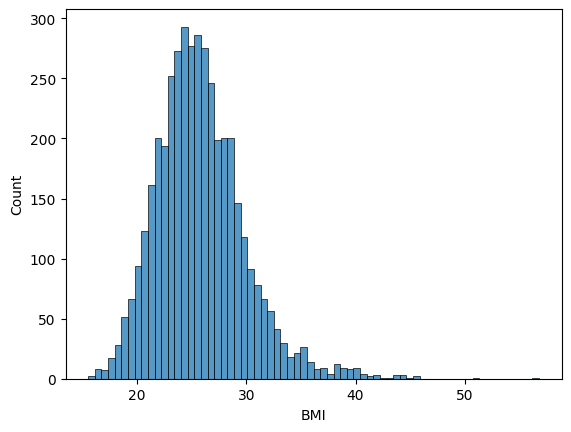

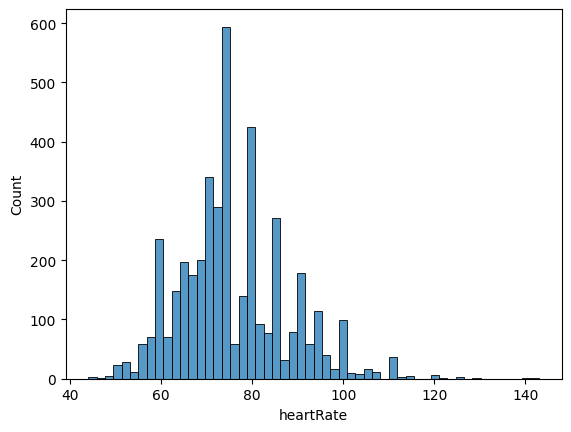

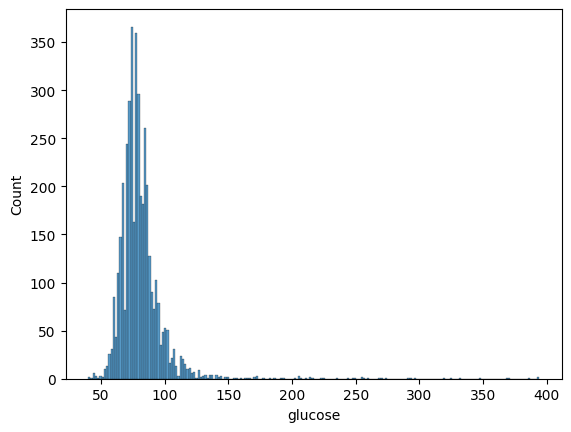

In [116]:
for i in ['age', 'education',  'cigsPerDay', 
        'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']:
    sns.histplot(data = df,x = df[i])
    plt.show()

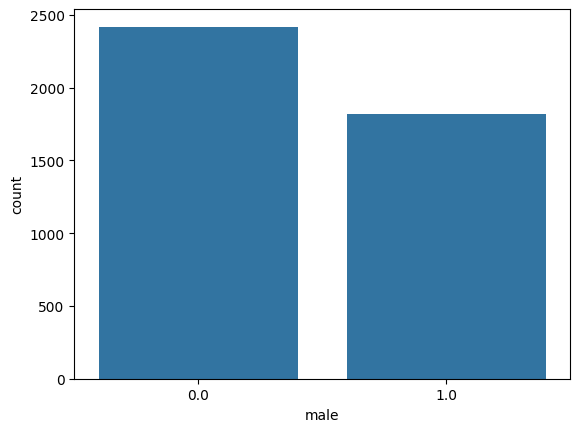

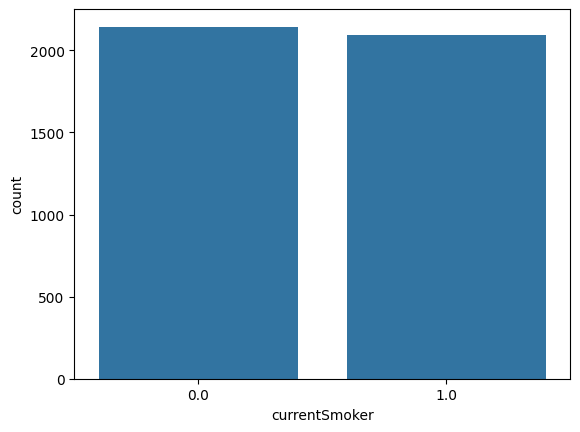

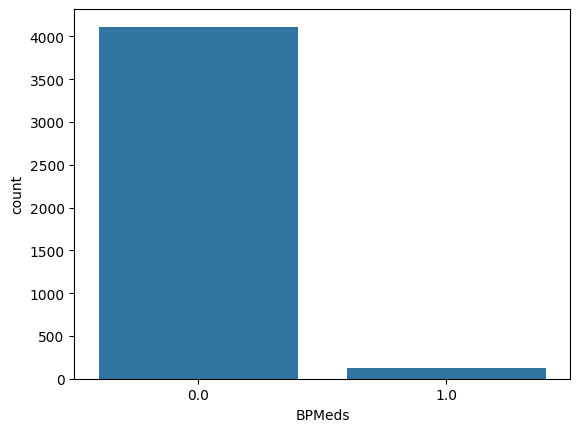

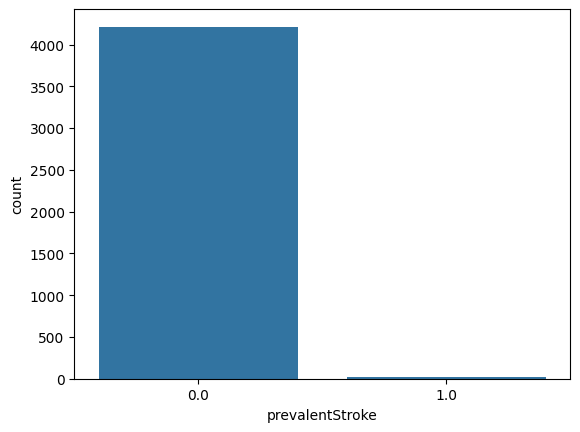

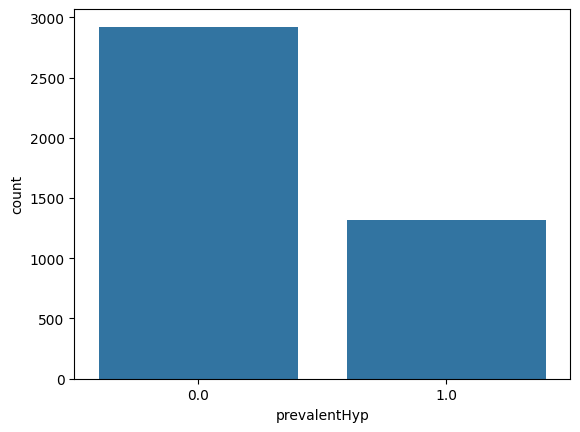

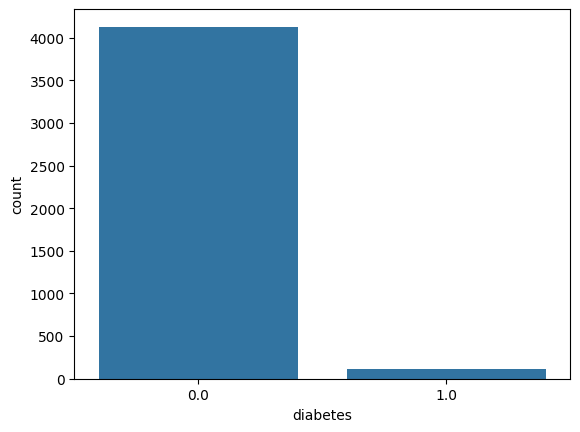

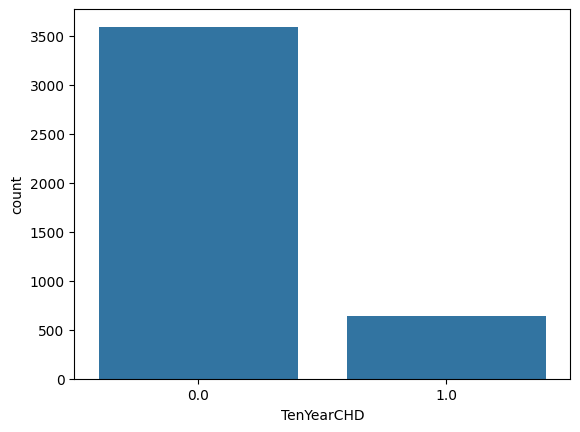

In [117]:
#for binary values
for i in ['male', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes',  'TenYearCHD']:
    sns.countplot(x=df[i], data=df)
    plt.show()

In [118]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

BOX PLOTS

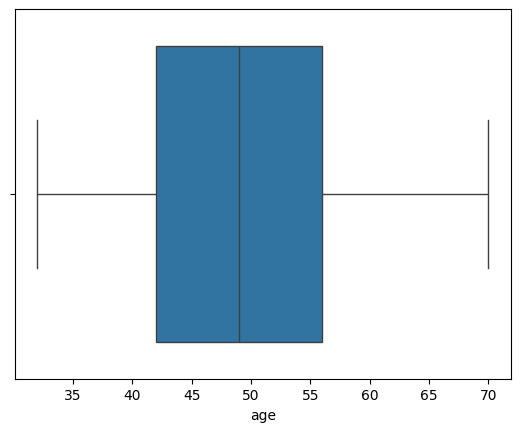

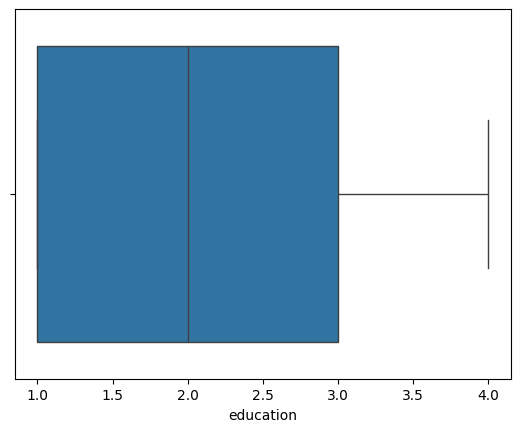

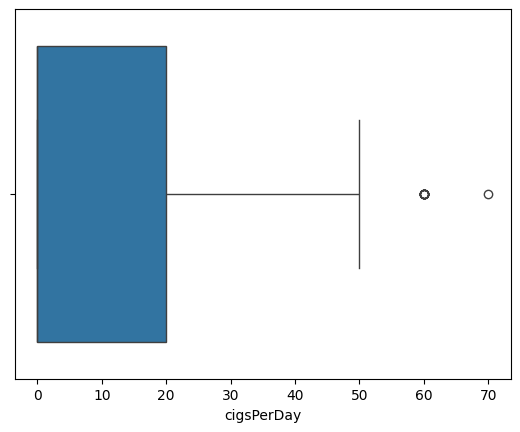

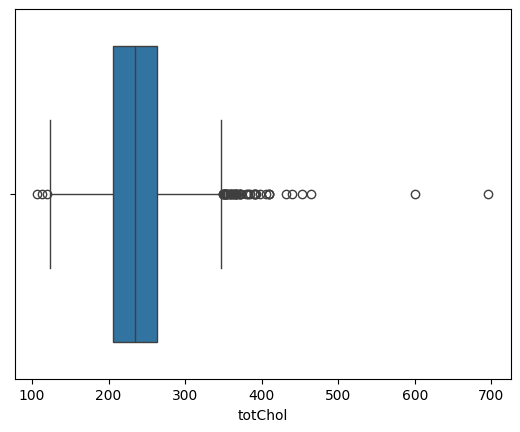

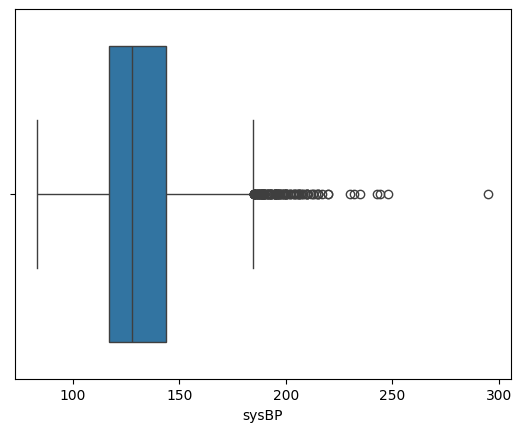

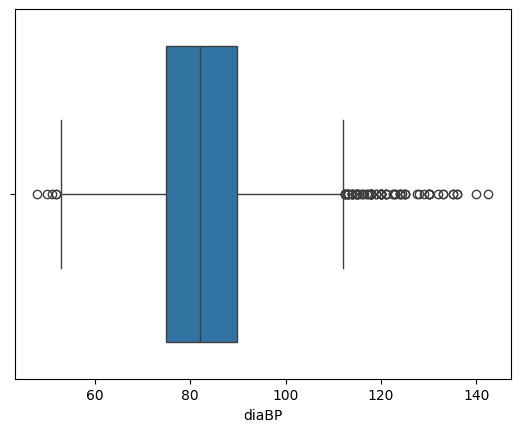

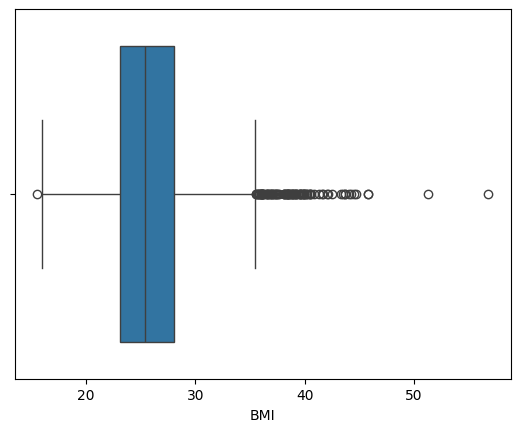

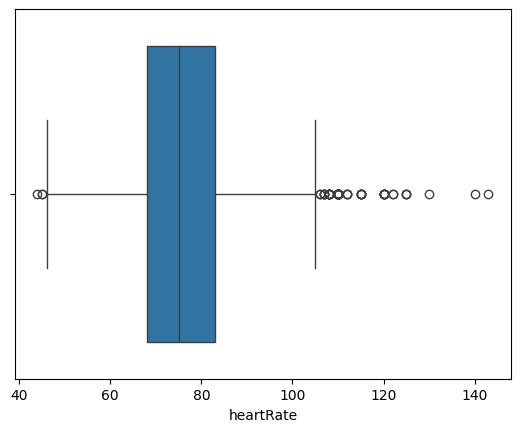

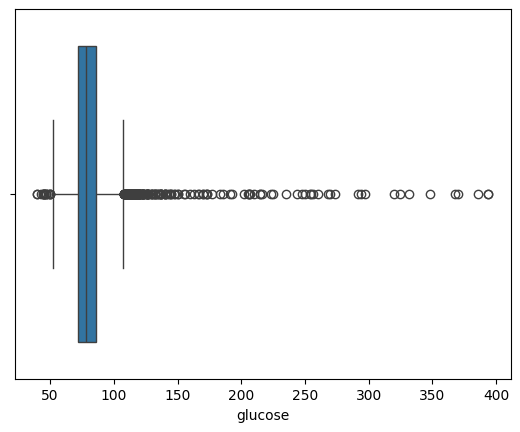

In [119]:
for i in ['age', 'education',  'cigsPerDay', 
        'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']:
    sns.boxplot(data = df,x = df[i])
    plt.show()

Handling Outliers

In [120]:
df1 = df.copy()# treating outlier by making giving it values of lower or upper whisker
df2 = df.copy()# treating outlier by making giving it mean values

In [121]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR




for i in ['cigsPerDay', 
        'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']:
    df1.loc[df[i] < lower_whisker[i], i] = lower_whisker[i]
    df1.loc[df[i] > upper_whisker[i], i] = upper_whisker[i]



In [122]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR




for i in ['cigsPerDay', 
        'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']:
    df2.loc[df[i] < lower_whisker[i], i] = df2[i].mean()
    df2.loc[df[i] > upper_whisker[i], i] = df2[i].mean()

In [123]:
correlation = df1.corr()

<Axes: >

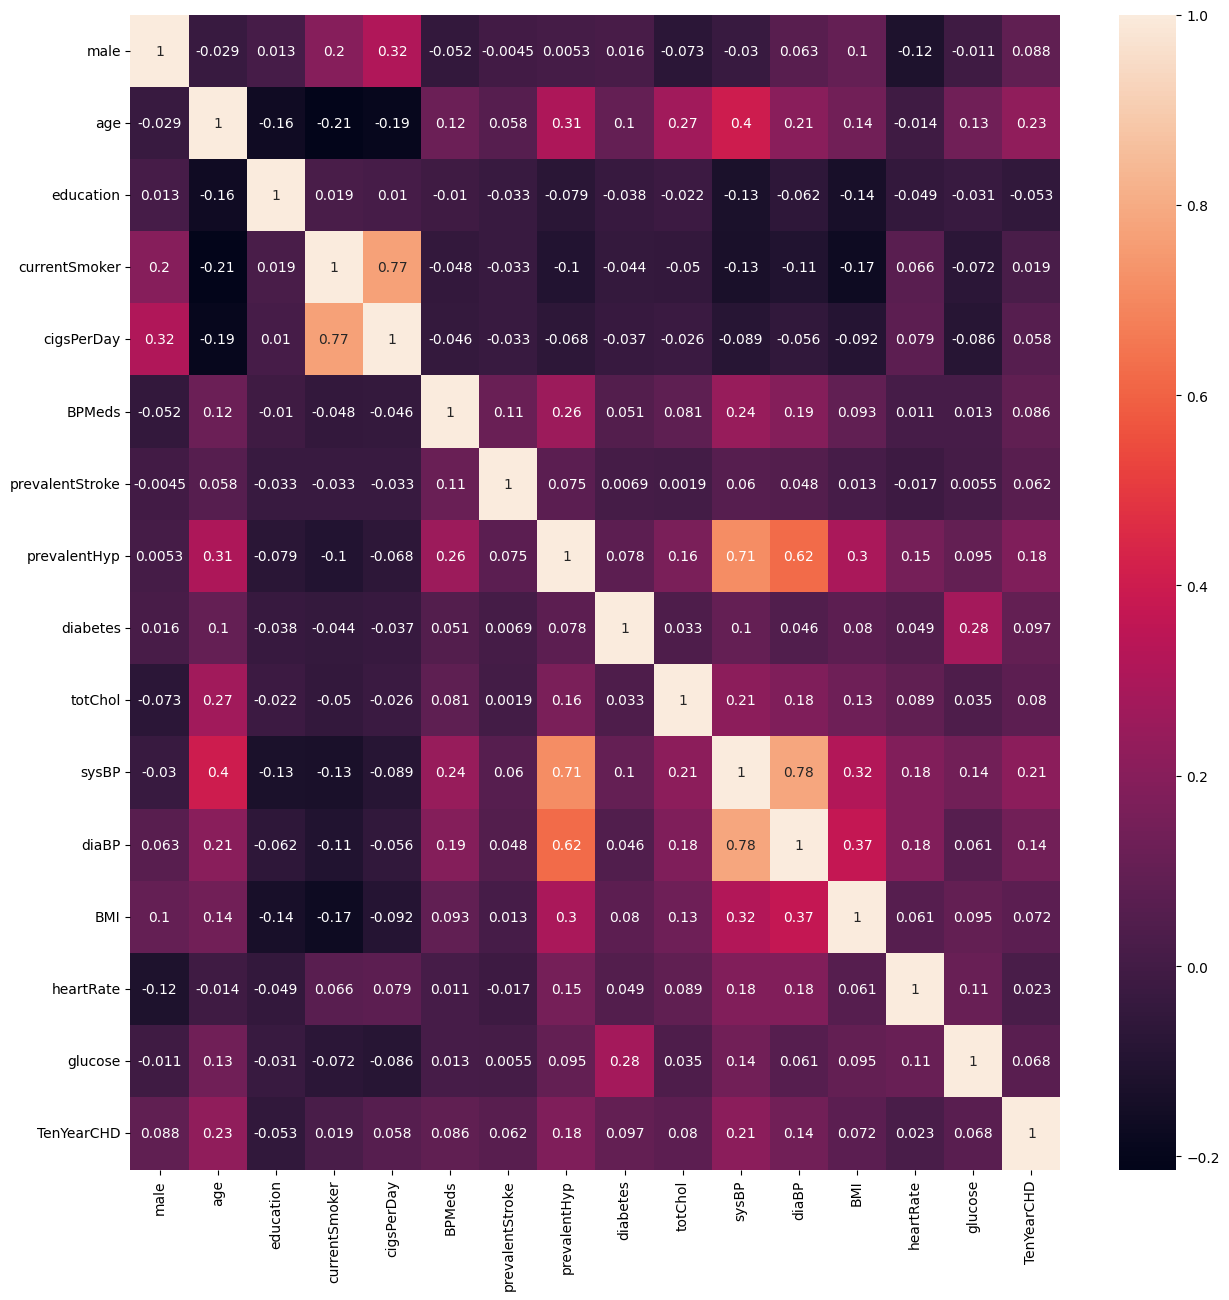

In [124]:
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot=True)

<Axes: >

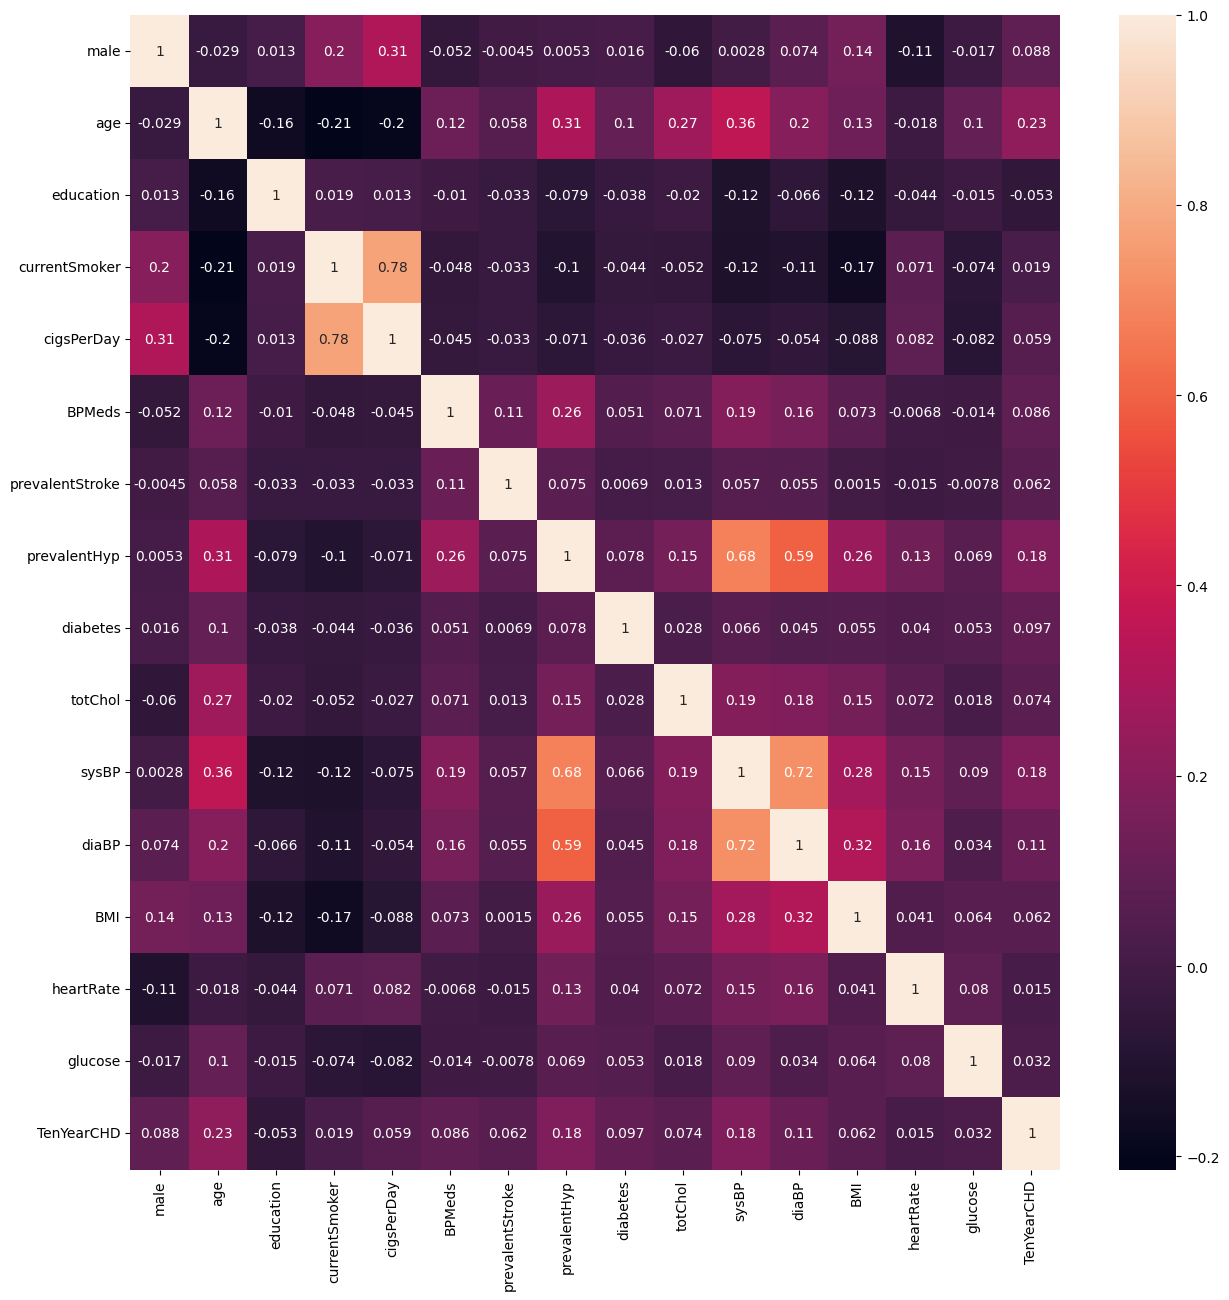

In [125]:
correlation = df2.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot=True)

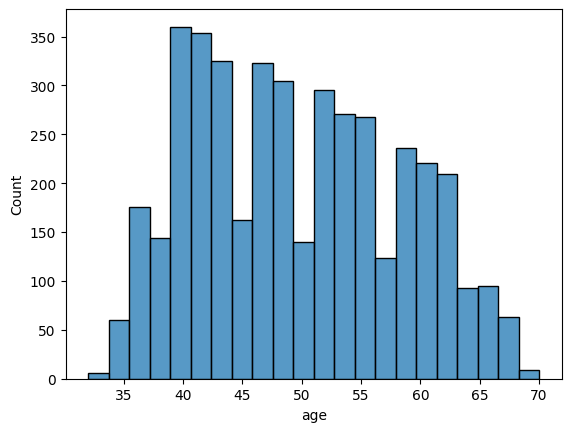

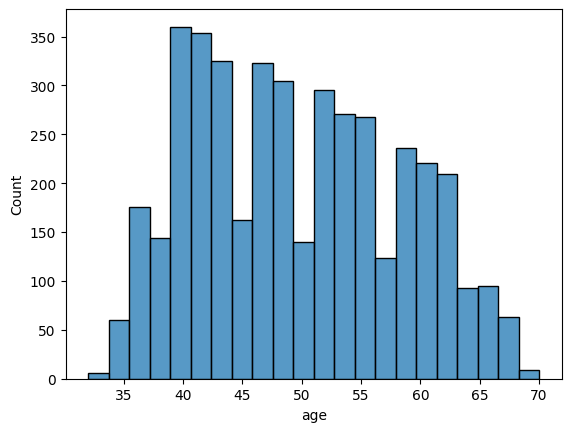

In [126]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["age"])
    plt.show()

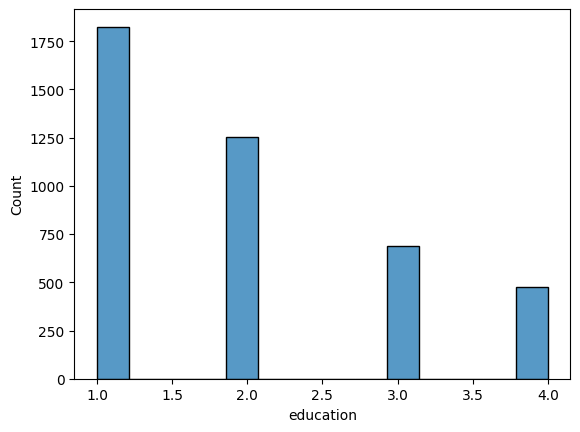

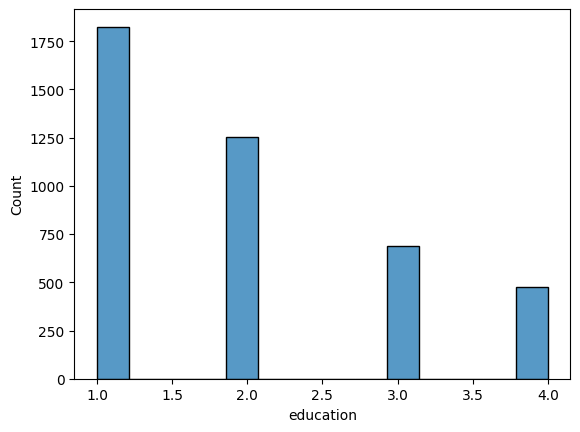

In [127]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["education"])
    plt.show()

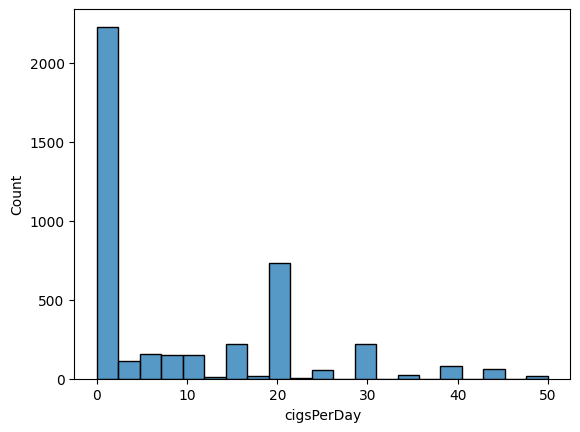

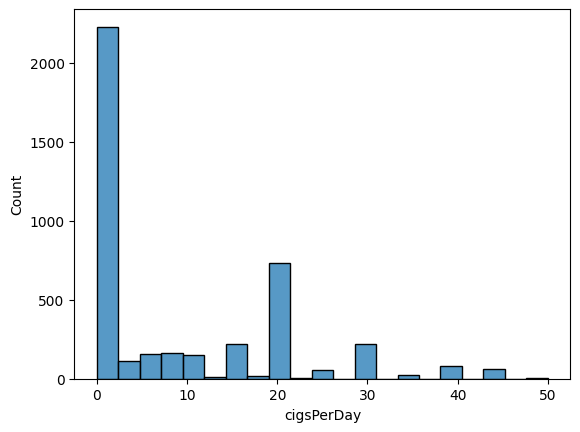

In [128]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["cigsPerDay"])
    plt.show()

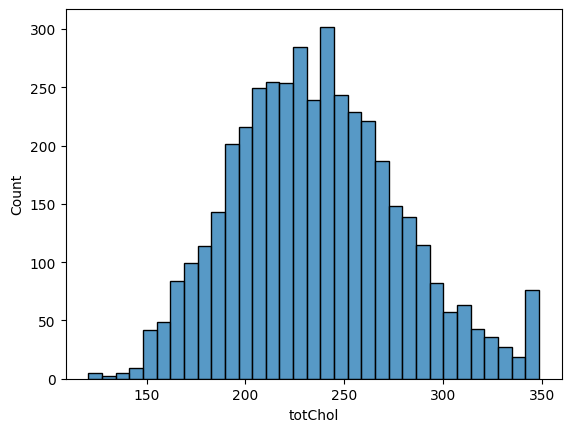

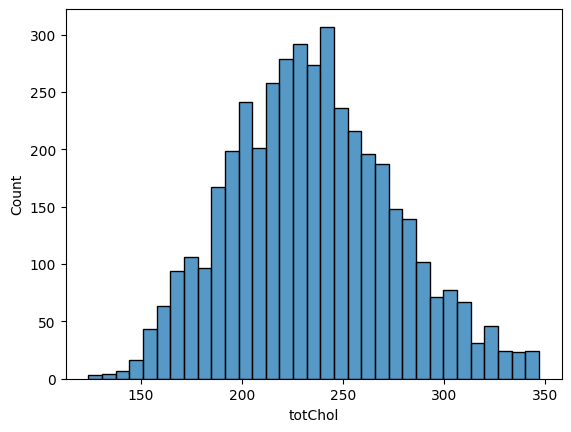

In [129]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["totChol"])
    plt.show()

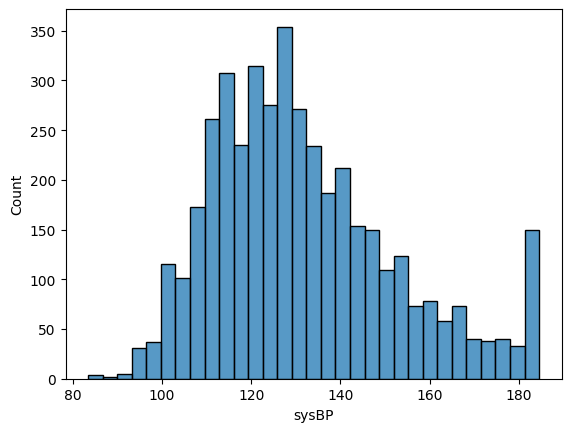

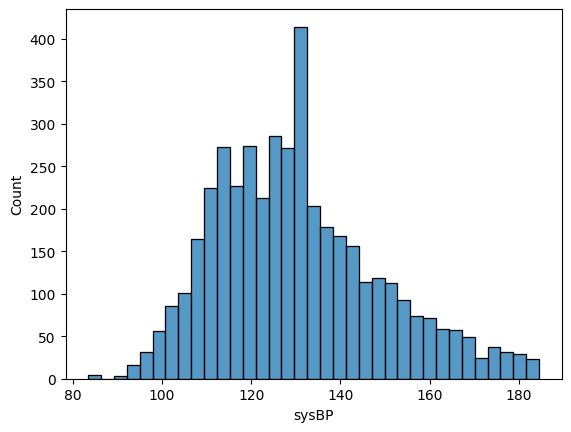

In [130]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["sysBP"])
    plt.show()

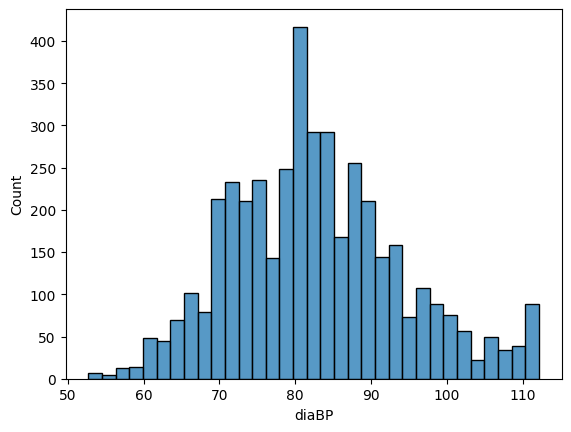

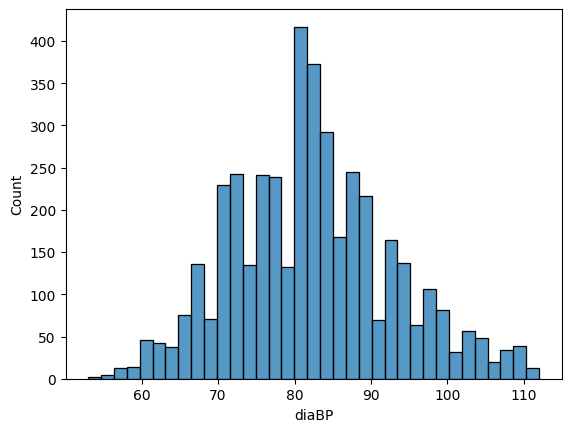

In [131]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["diaBP"])
    plt.show()

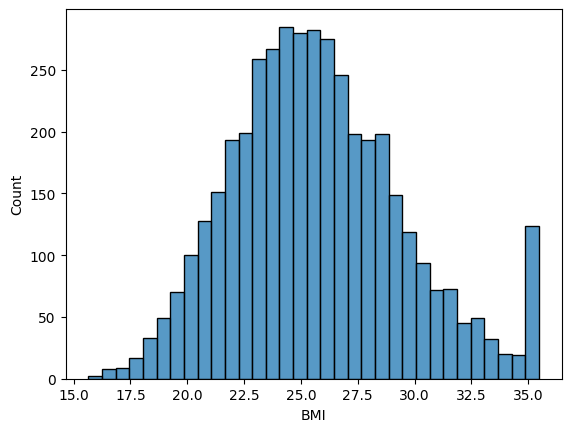

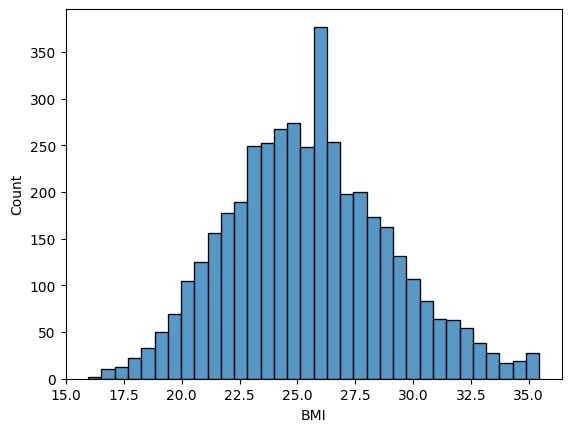

In [132]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["BMI"])
    plt.show()

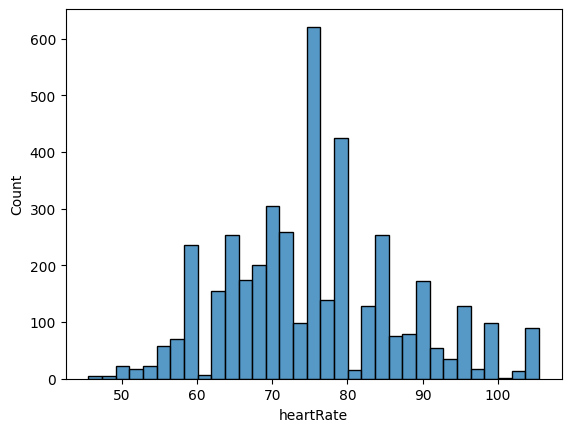

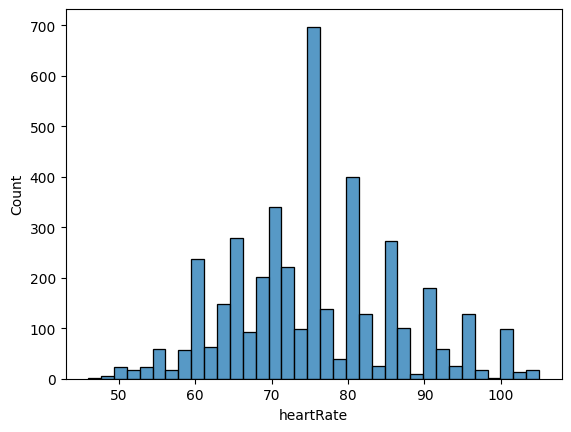

In [133]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["heartRate"])
    plt.show()

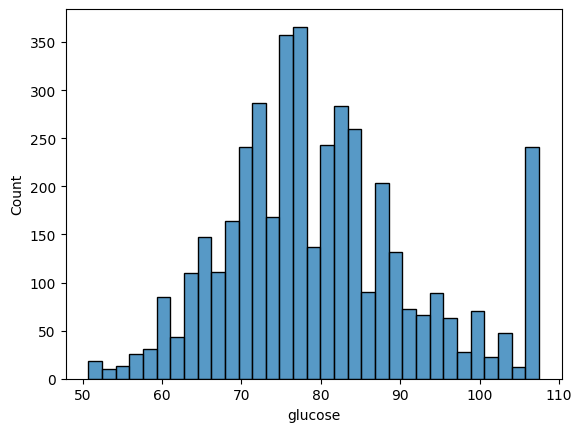

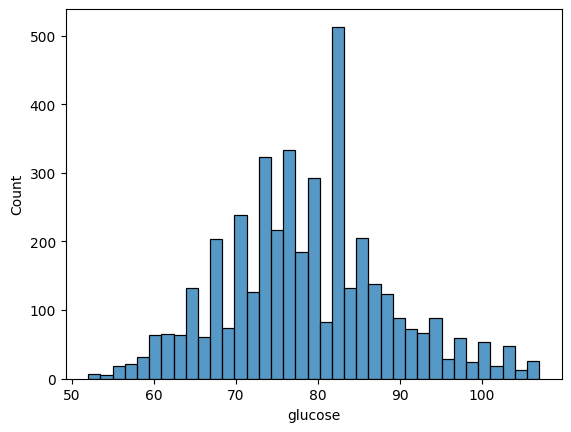

In [134]:
for i in [df1 ,df2]:
    sns.histplot(data = i,x = i["glucose"])
    plt.show()

In [135]:
correlation = df1.corr()
target_column = "TenYearCHD"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

TenYearCHD         1.000000
age                0.225256
sysBP              0.209686
prevalentHyp       0.177603
diaBP              0.140473
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol            0.079569
BMI                0.071741
glucose            0.068004
prevalentStroke    0.061810
cigsPerDay         0.058418
heartRate          0.022870
currentSmoker      0.019456
education         -0.052812
Name: TenYearCHD, dtype: float64

In [136]:
correlation = df2.corr()
target_column = "TenYearCHD"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

TenYearCHD         1.000000
age                0.225256
prevalentHyp       0.177603
sysBP              0.177000
diaBP              0.114088
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol            0.073805
BMI                0.062405
prevalentStroke    0.061810
cigsPerDay         0.059042
glucose            0.032016
currentSmoker      0.019456
heartRate          0.014783
education         -0.052812
Name: TenYearCHD, dtype: float64

# KNN

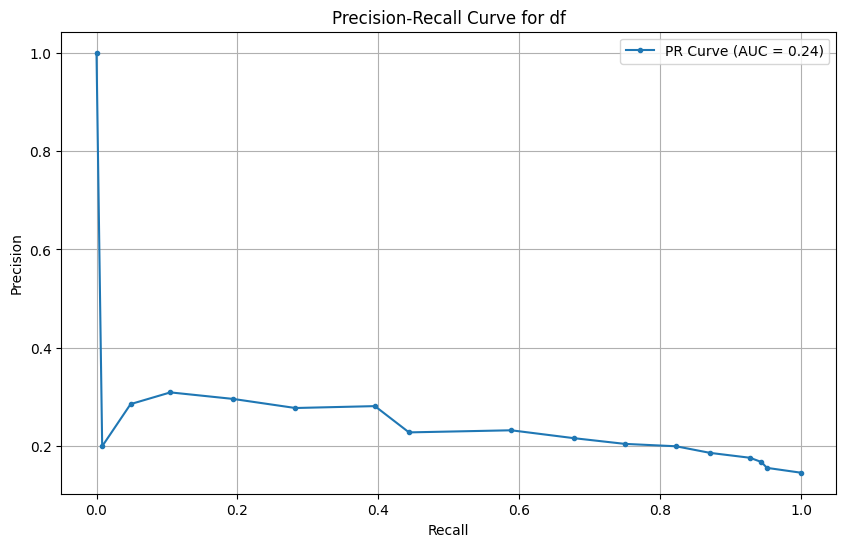

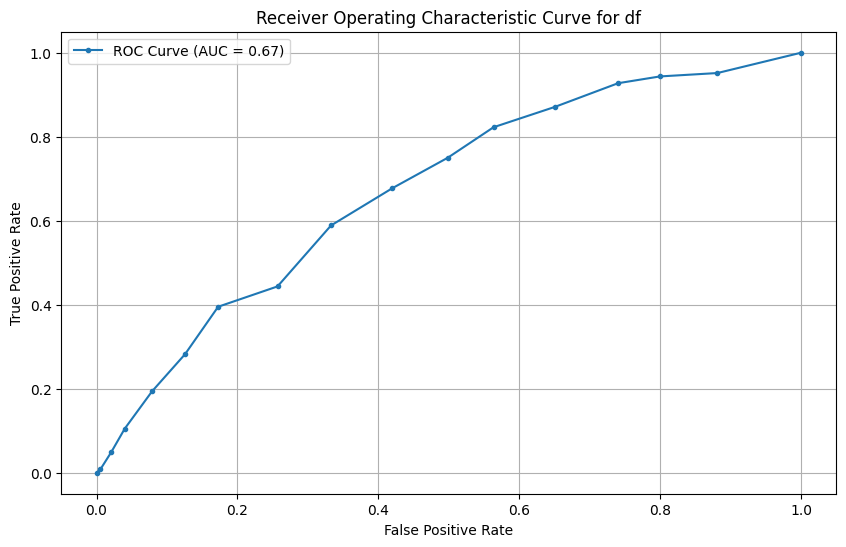

Accuracy for df: 0.66
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77       724
         1.0       0.23      0.59      0.33       124

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.66      0.70       848



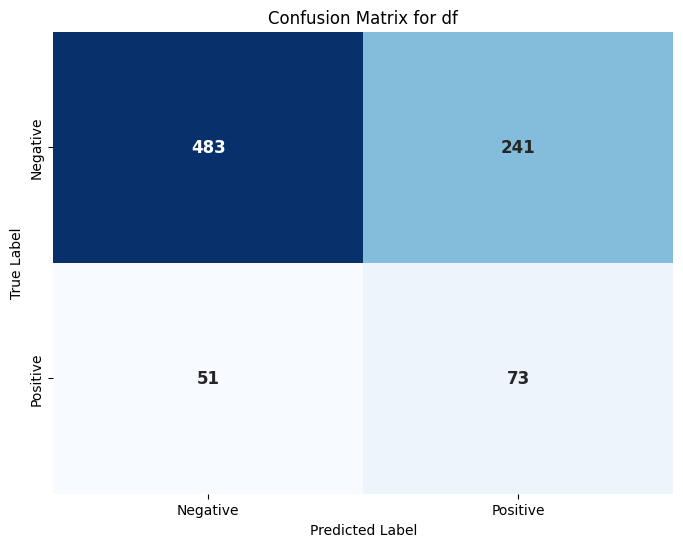

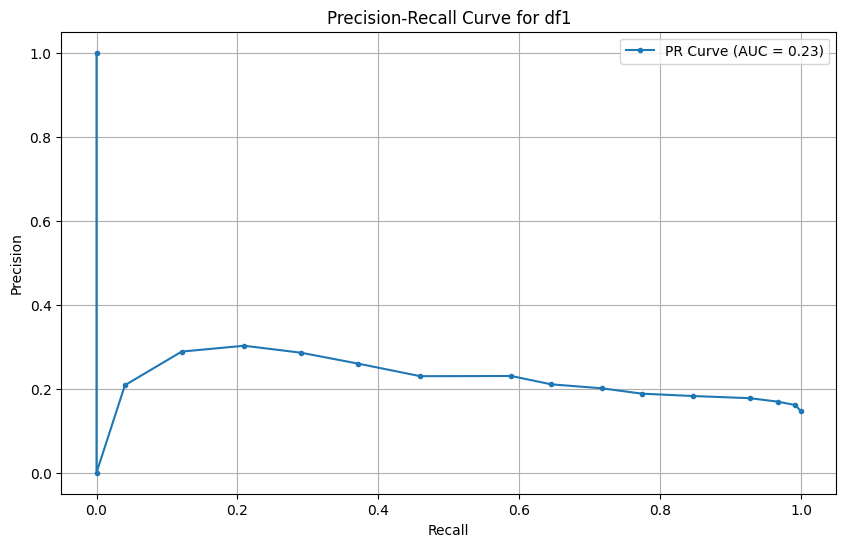

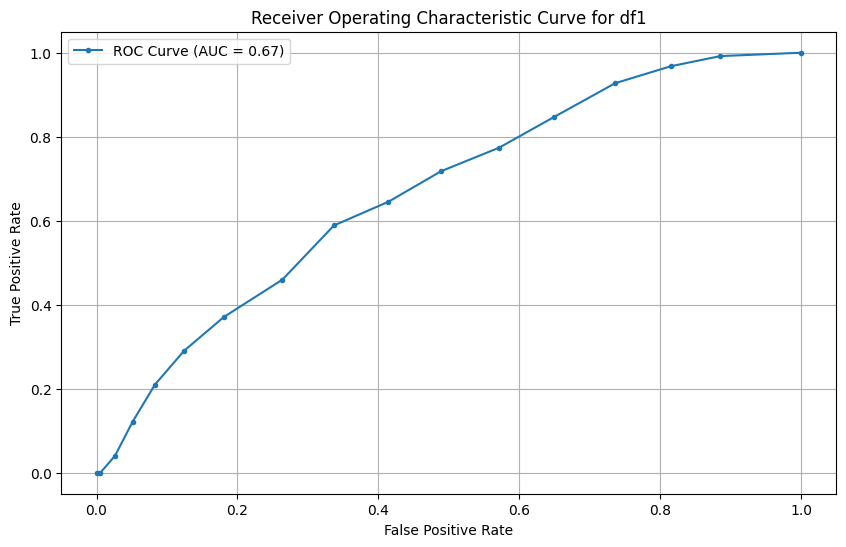

Accuracy for df1: 0.65
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76       724
         1.0       0.23      0.59      0.33       124

    accuracy                           0.65       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.65      0.70       848



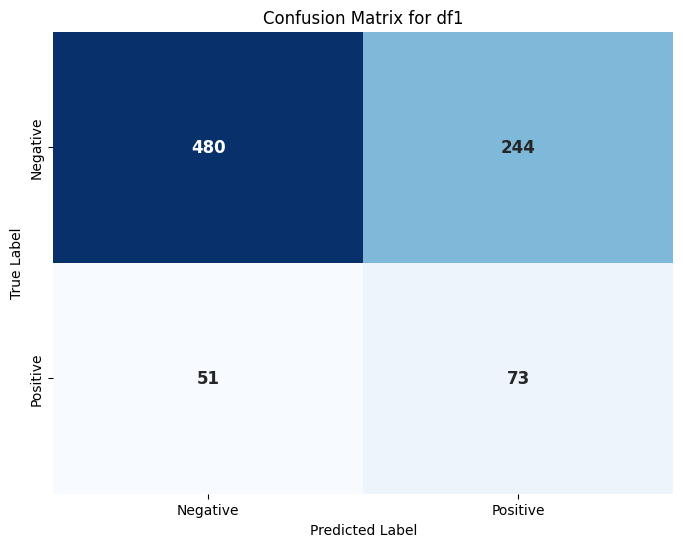

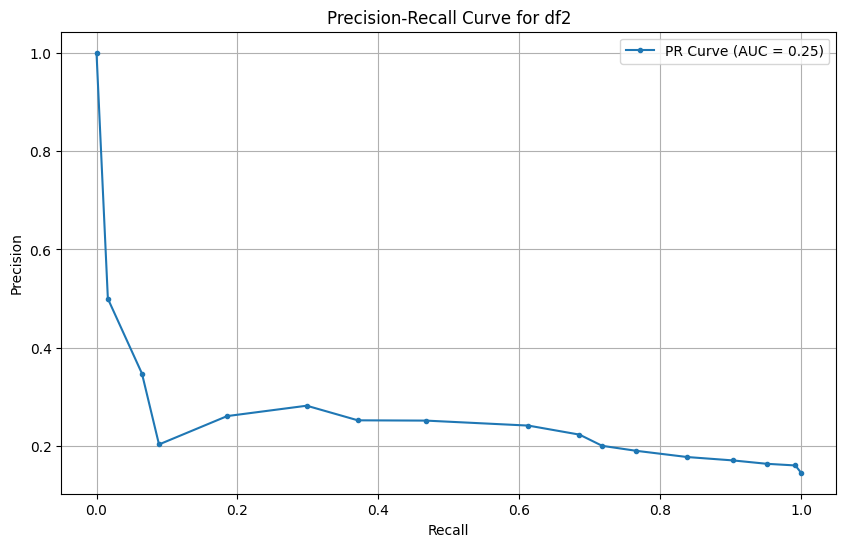

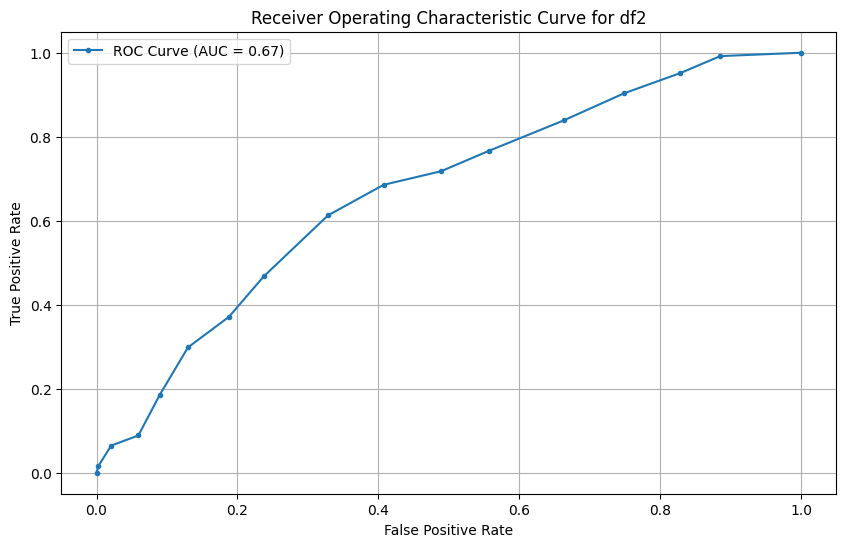

Accuracy for df2: 0.66
Classification Report for df2:
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77       724
         1.0       0.24      0.61      0.35       124

    accuracy                           0.66       848
   macro avg       0.58      0.64      0.56       848
weighted avg       0.81      0.66      0.71       848



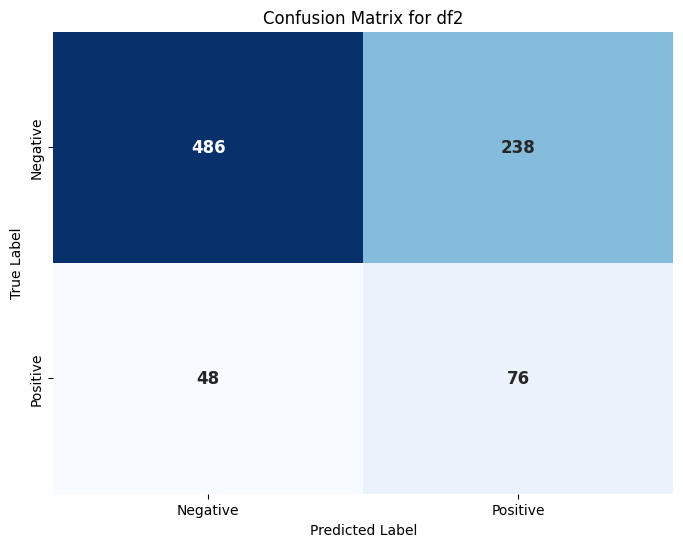

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling

# Helper function to perform KNN with scaling, plot PR curve, ROC curve, calculate AUC, accuracy, classification report, and confusion matrix
def knn_pr_roc_curve_and_report(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=15)

    # Fit the classifier on the scaled training data
    knn.fit(X_train_scaled, y_train_resampled)

    # Get the predicted probabilities for the positive class
    y_scores = knn.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)

    # Calculate ROC values
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_scores)

    # Calculate accuracy
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)

    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Dataset labels and data
datasets = {
    'df': (df, 'TenYearCHD'),
    'df1': (df1, 'TenYearCHD'),
    'df2': (df2, 'TenYearCHD'),
}

# Iterate through each dataset, perform KNN classification with SMOTE, scaling, plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    knn_pr_roc_curve_and_report(X, y, label)


# Logisitic Regression

In [138]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, classification_report

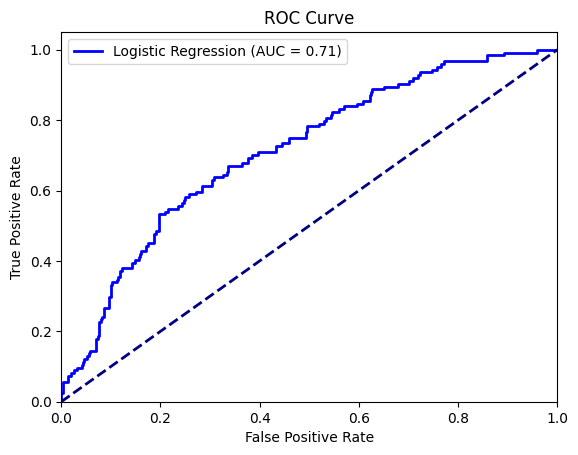

Accuracy: 0.8526
Precision: 0.4667
Recall: 0.0565
F1 Score: 0.1007
[[716   8]
 [117   7]]
0.8485 (accuracy)


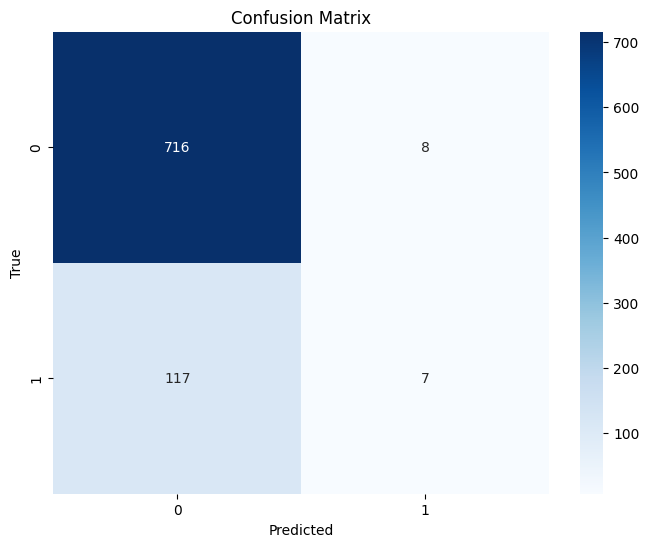

Total number of correct predictions = 723 out of 848


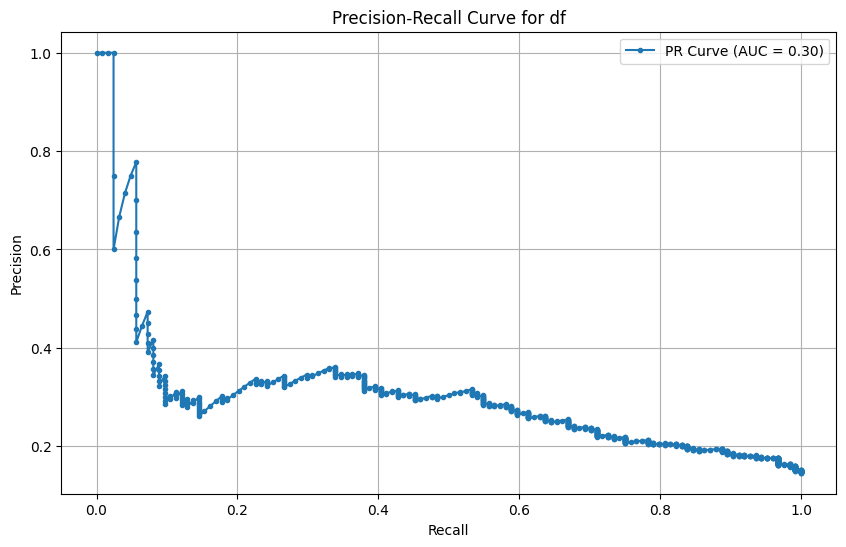

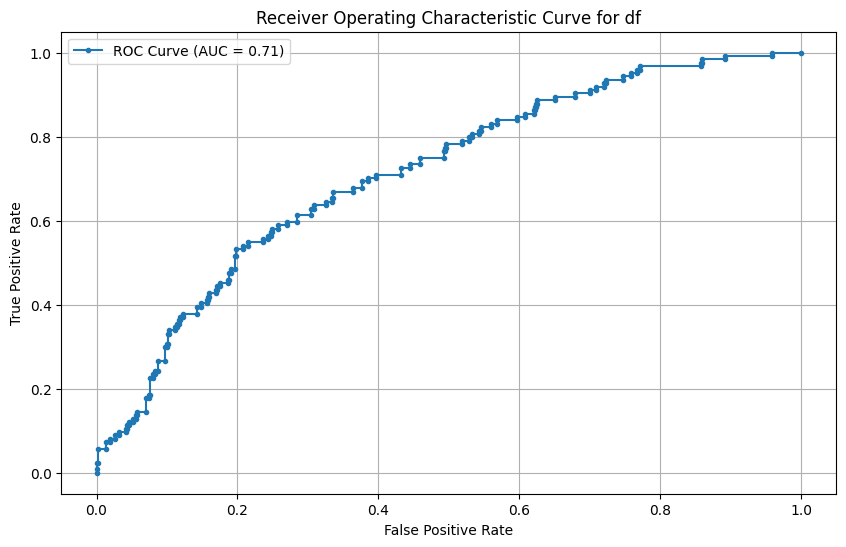

Accuracy for df: 0.85
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.47      0.06      0.10       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.51       848
weighted avg       0.80      0.85      0.80       848



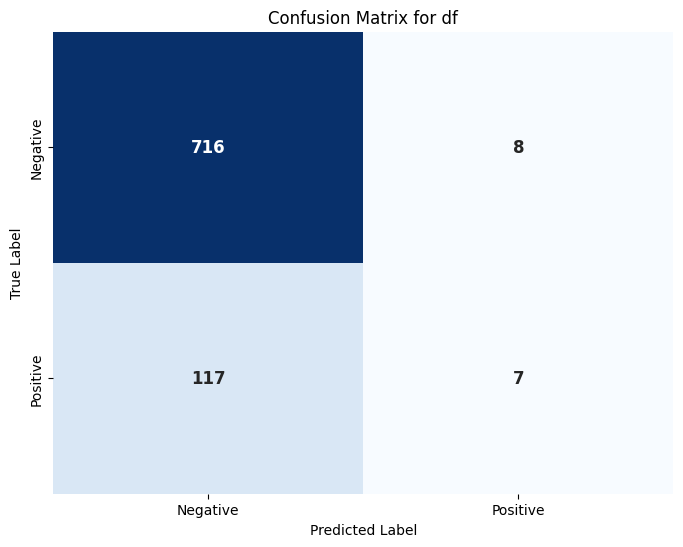

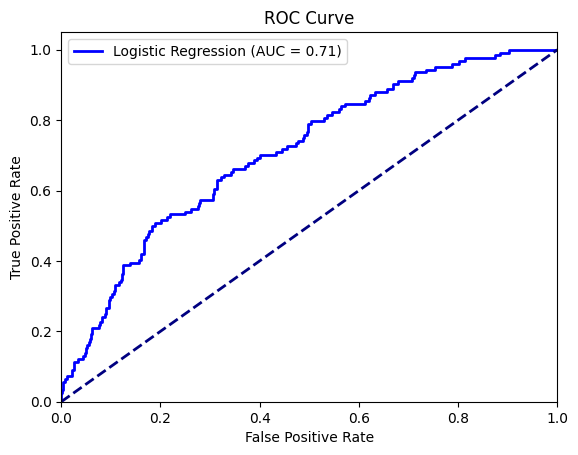

Accuracy: 0.8573
Precision: 0.6154
Recall: 0.0645
F1 Score: 0.1168
[[719   5]
 [116   8]]
0.8485 (accuracy)


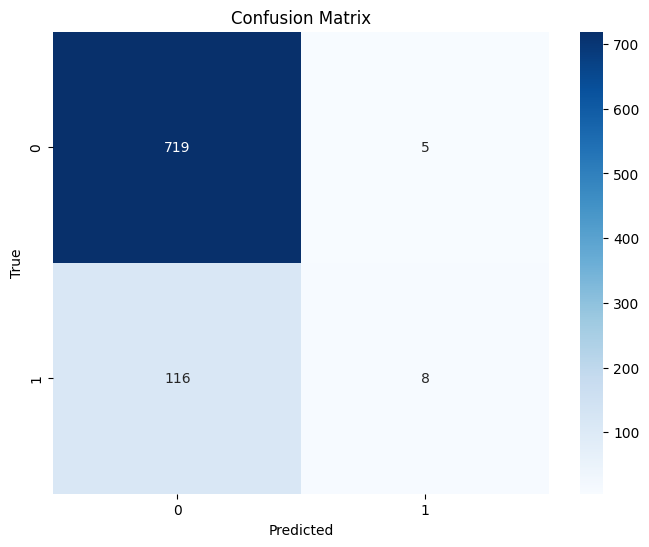

Total number of correct predictions = 727 out of 848


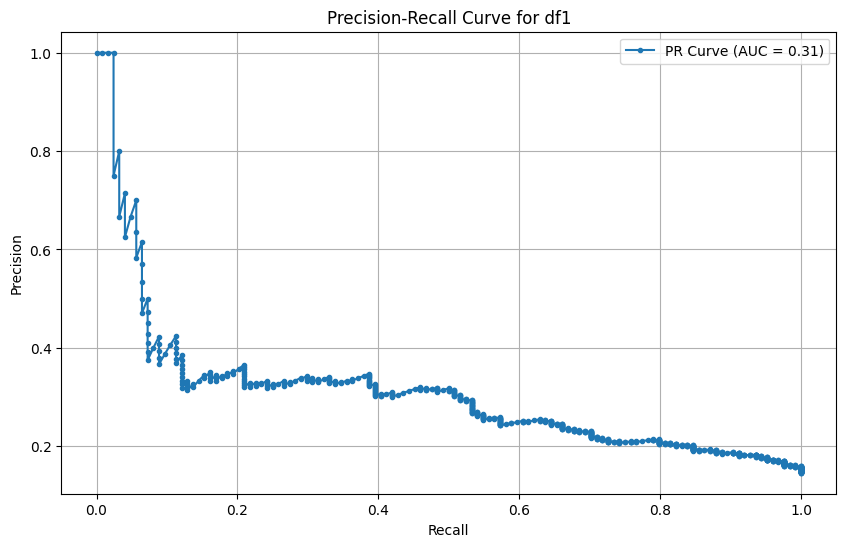

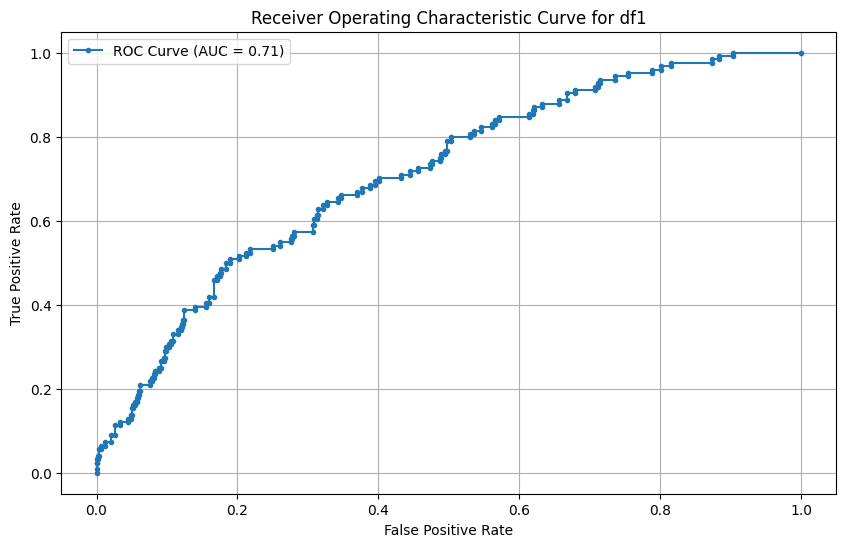

Accuracy for df1: 0.86
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.62      0.06      0.12       124

    accuracy                           0.86       848
   macro avg       0.74      0.53      0.52       848
weighted avg       0.83      0.86      0.80       848



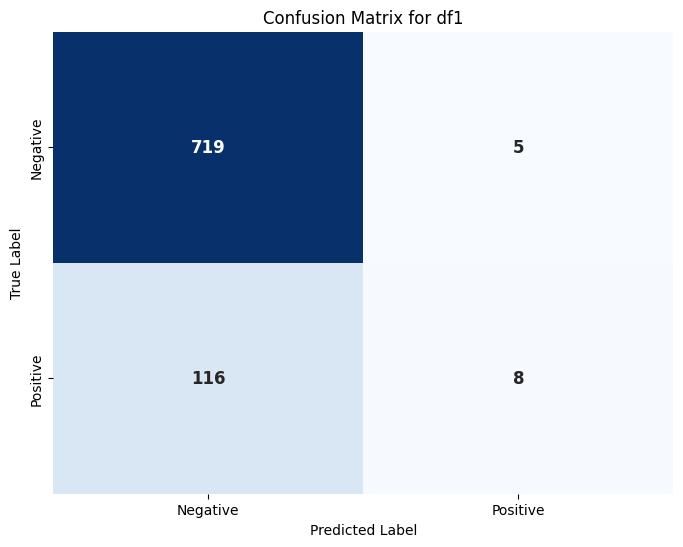

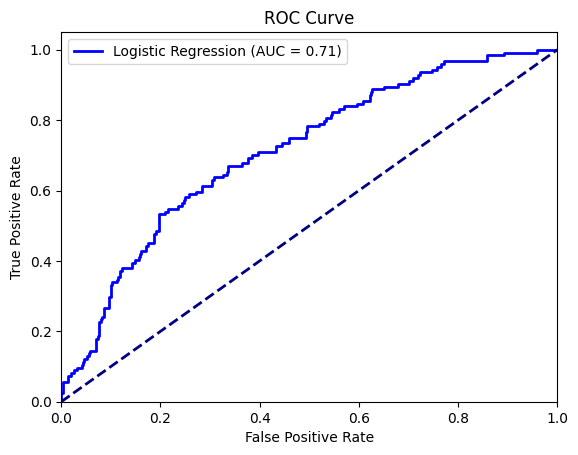

Accuracy: 0.8526
Precision: 0.4667
Recall: 0.0565
F1 Score: 0.1007
[[716   8]
 [117   7]]
0.8485 (accuracy)


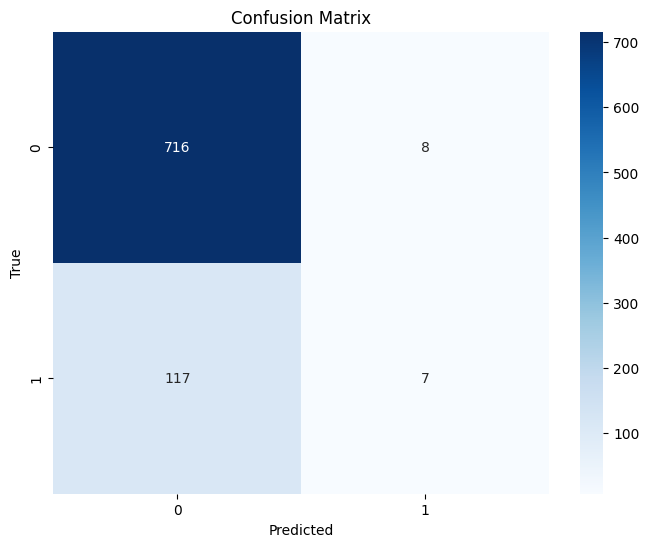

Total number of correct predictions = 723 out of 848


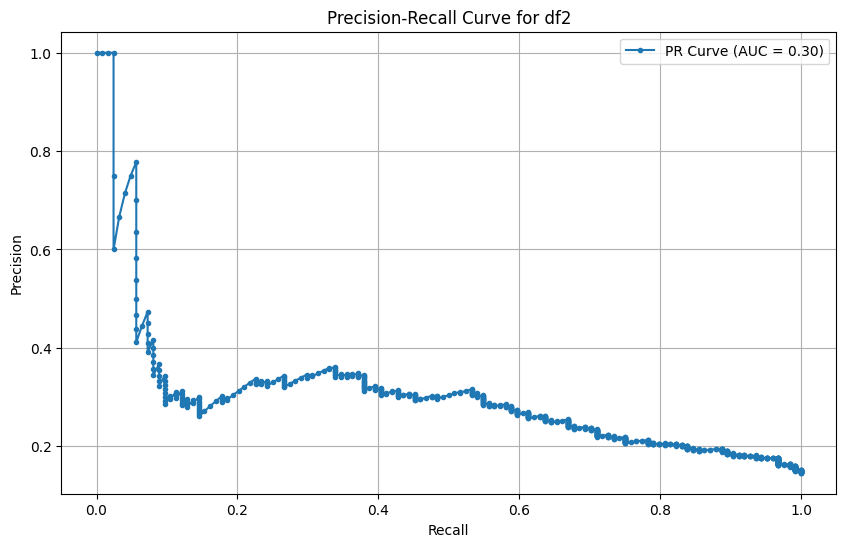

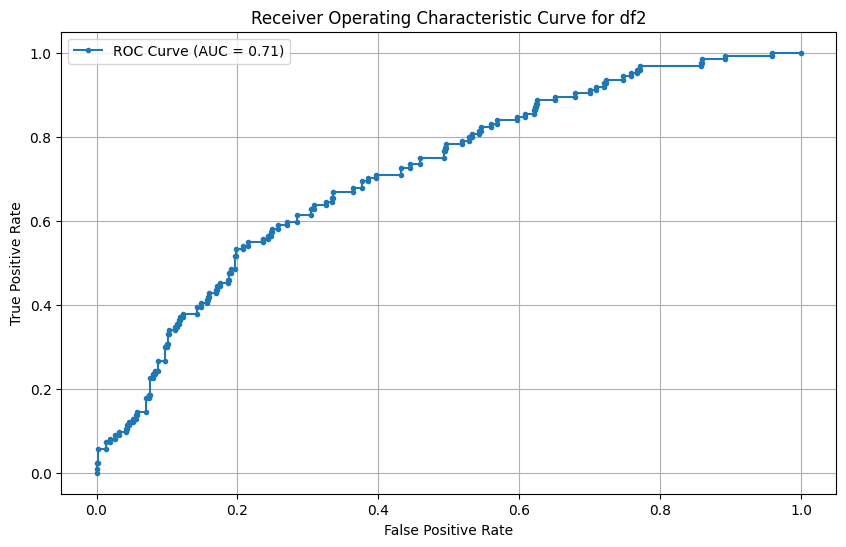

Accuracy for df2: 0.85
Classification Report for df2:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.47      0.06      0.10       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.51       848
weighted avg       0.80      0.85      0.80       848



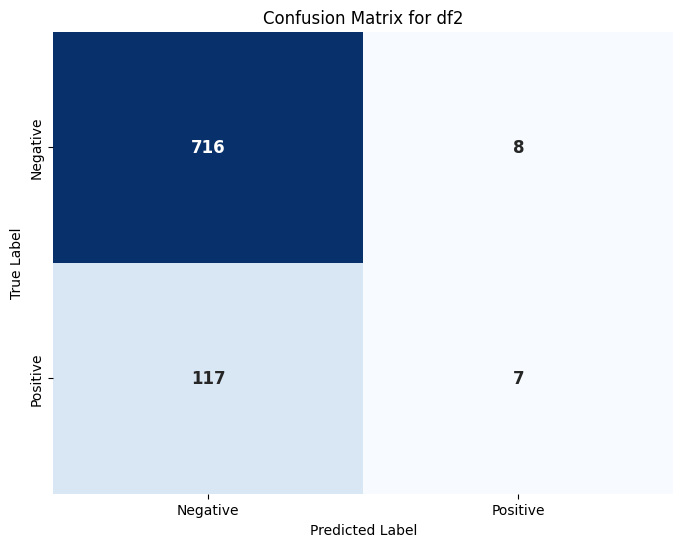

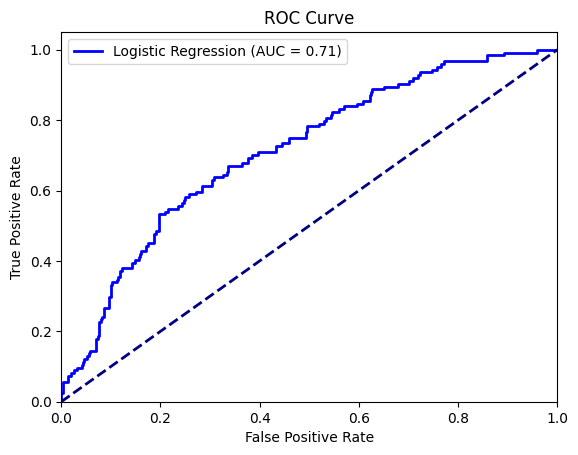

Accuracy: 0.8526
Precision: 0.4667
Recall: 0.0565
F1 Score: 0.1007
[[716   8]
 [117   7]]
0.8485 (accuracy)


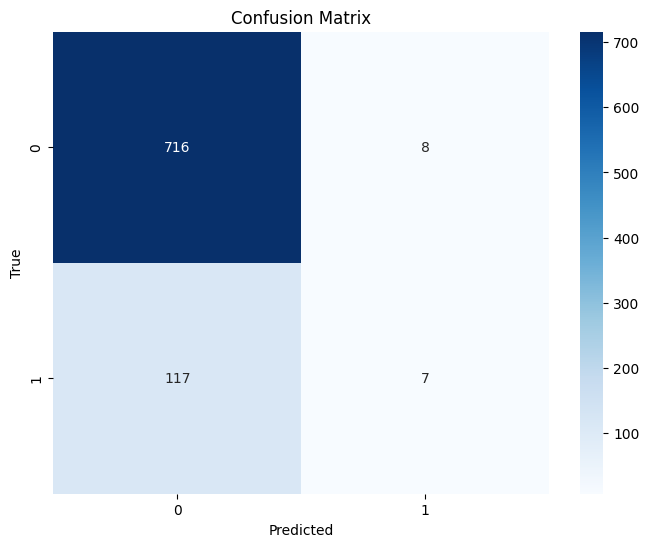

Total number of correct predictions = 723 out of 848


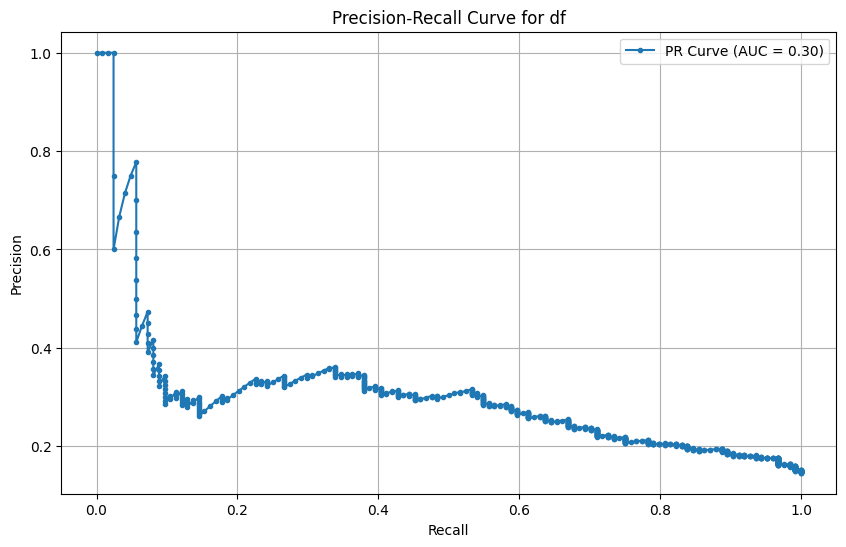

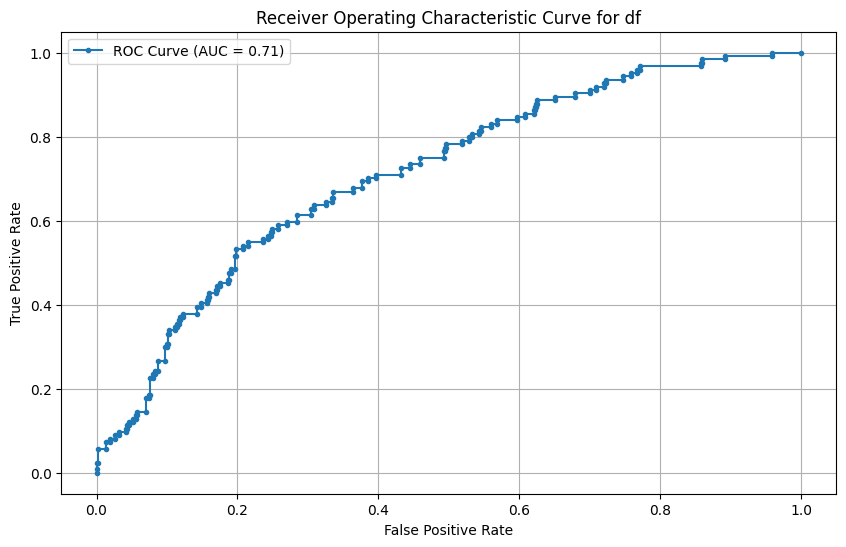

Accuracy for df: 0.85
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.47      0.06      0.10       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.51       848
weighted avg       0.80      0.85      0.80       848



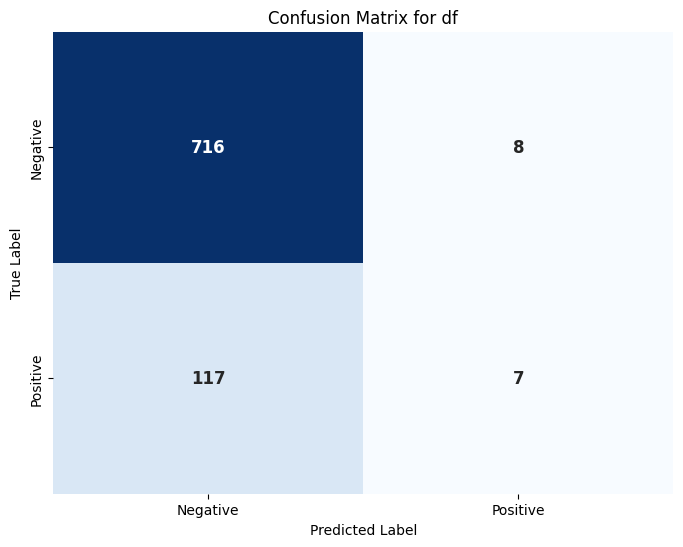

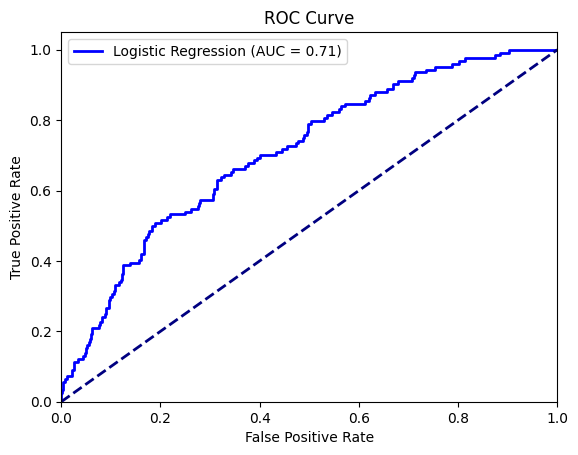

Accuracy: 0.8573
Precision: 0.6154
Recall: 0.0645
F1 Score: 0.1168
[[719   5]
 [116   8]]
0.8485 (accuracy)


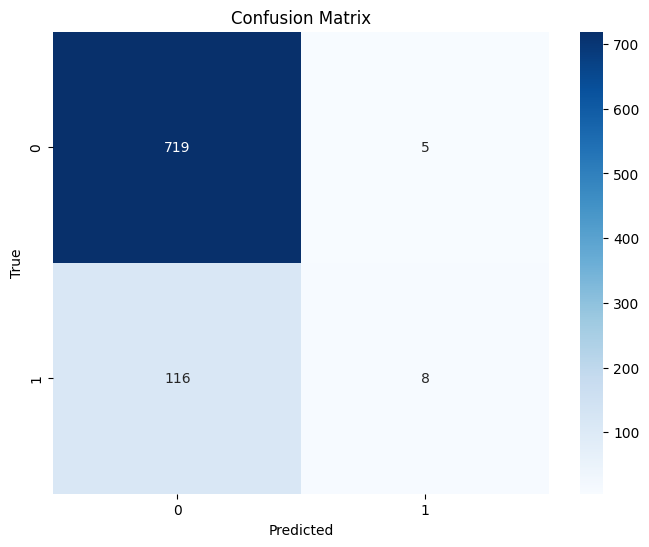

Total number of correct predictions = 727 out of 848


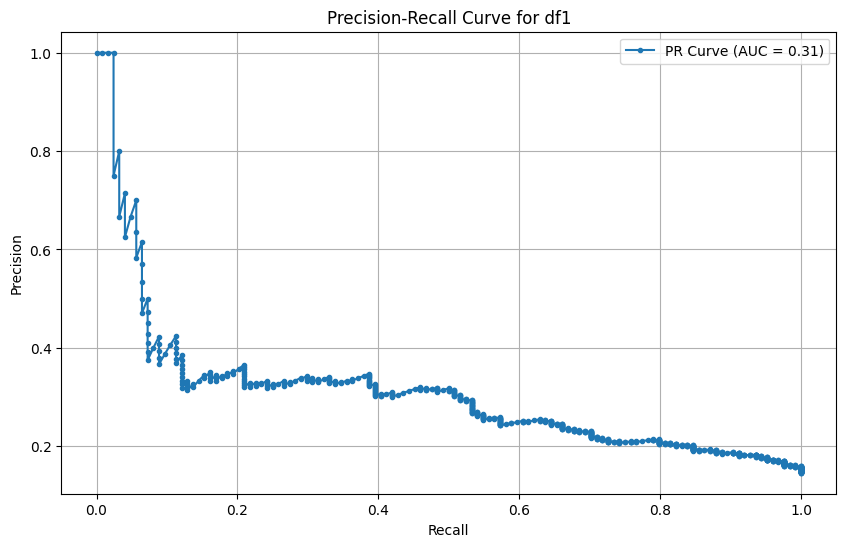

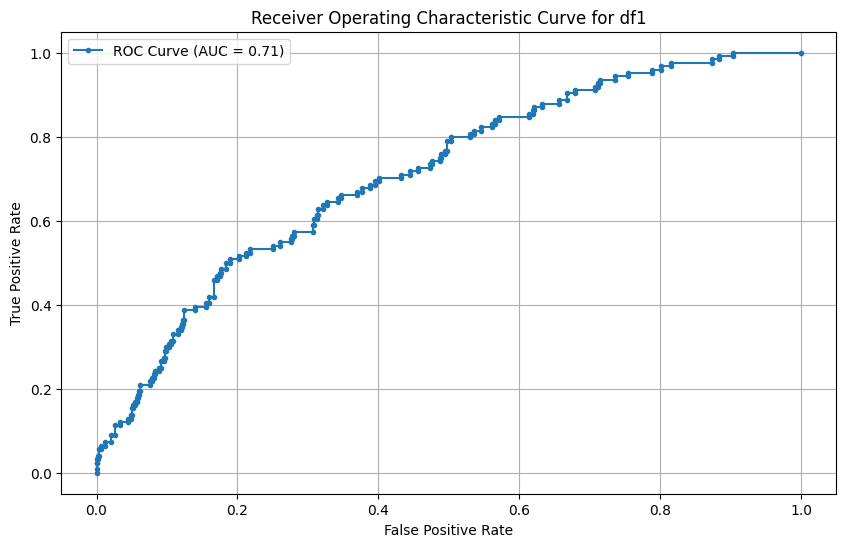

Accuracy for df1: 0.86
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.62      0.06      0.12       124

    accuracy                           0.86       848
   macro avg       0.74      0.53      0.52       848
weighted avg       0.83      0.86      0.80       848



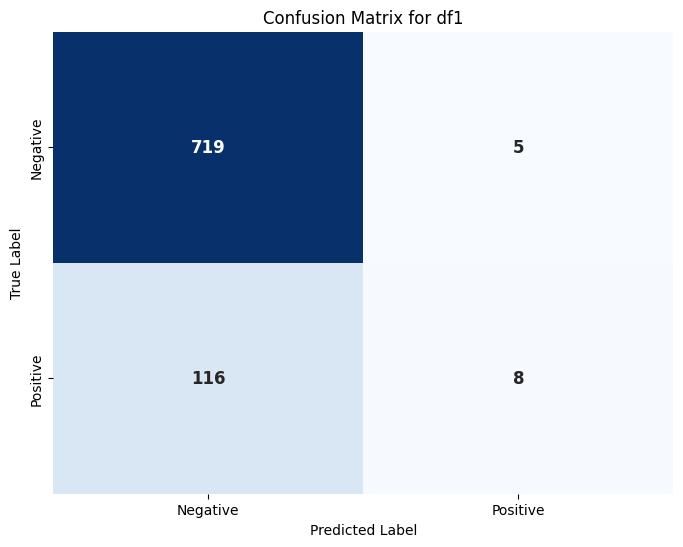

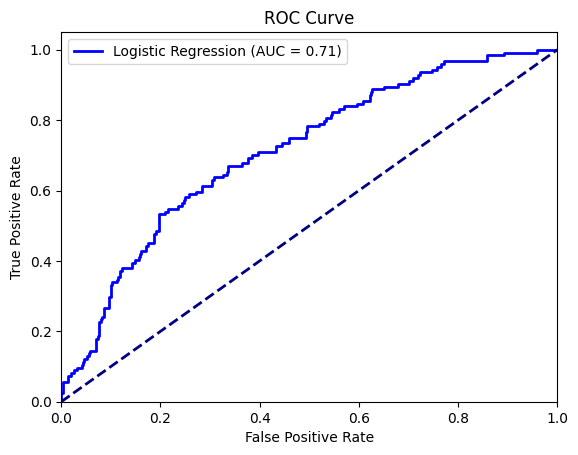

Accuracy: 0.8526
Precision: 0.4667
Recall: 0.0565
F1 Score: 0.1007
[[716   8]
 [117   7]]
0.8485 (accuracy)


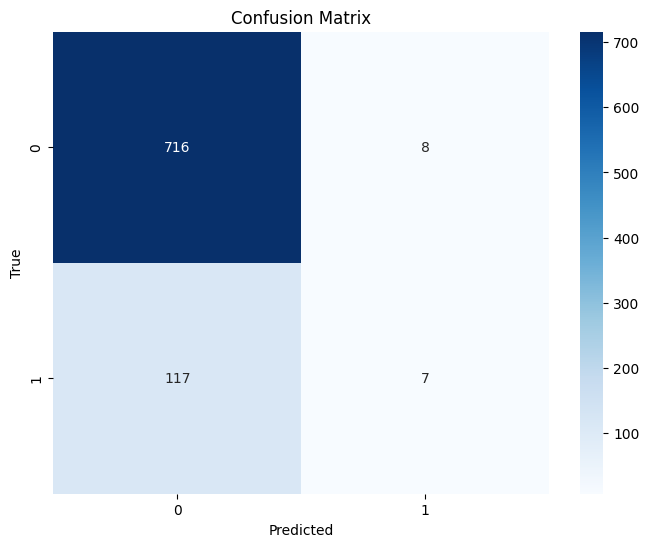

Total number of correct predictions = 723 out of 848


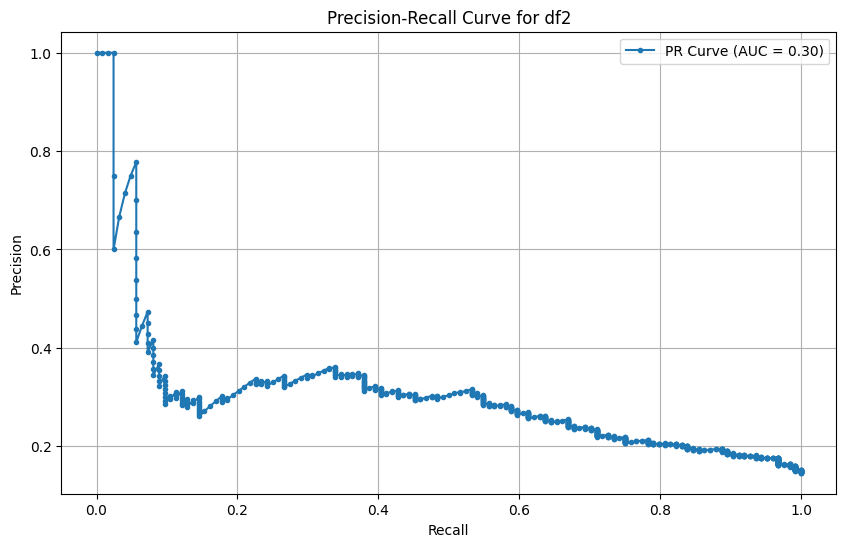

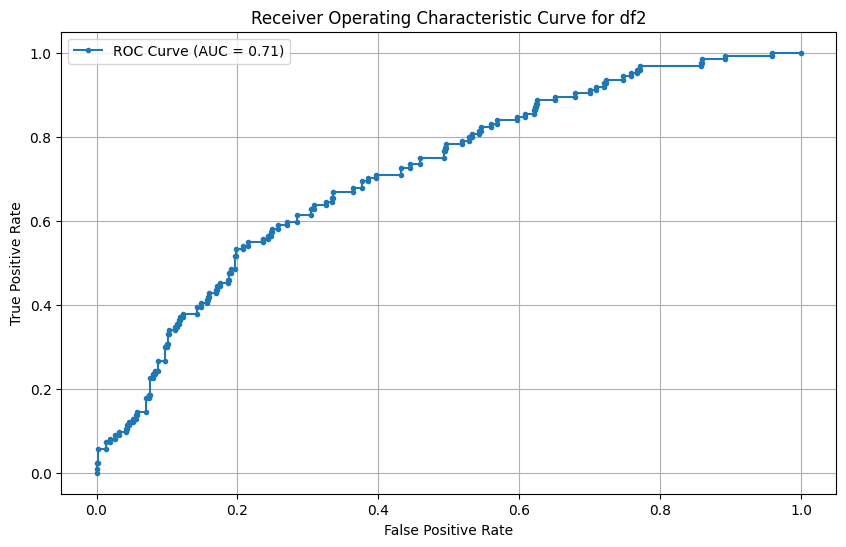

Accuracy for df2: 0.85
Classification Report for df2:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.47      0.06      0.10       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.51       848
weighted avg       0.80      0.85      0.80       848



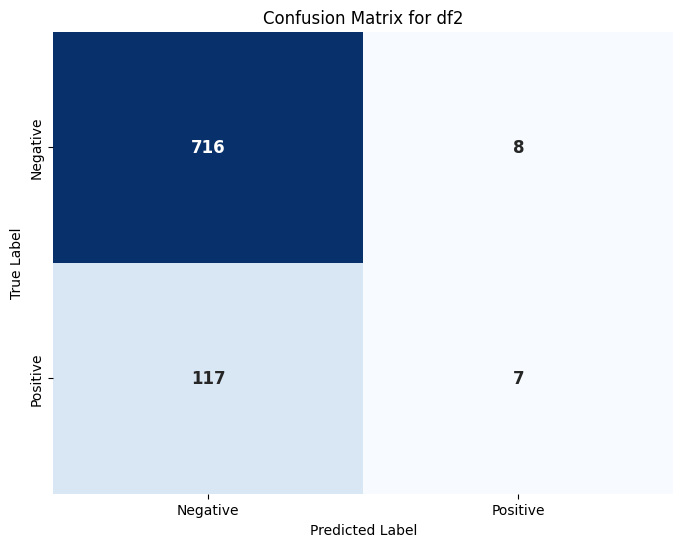

In [139]:
def logistic_regression(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the Logistic Regression model with increased max_iter and different solver
    logreg = LogisticRegression(random_state=42, max_iter=10000, solver='saga')
    logreg.fit(X_train, y_train)

    # Get the predicted probabilities
    y_score_logreg = logreg.predict_proba(X_test)[:, 1]

    # Predict the test set results
    y_pred = logreg.predict(X_test)

    # Compute ROC curve
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg, pos_label=1)

    # Plot ROC curve
    roc_auc_lg = auc(fpr_logreg, tpr_logreg)
    plt.figure()
    plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
    print(f"{scores.mean():.4f} (accuracy)")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_score_logreg)
    pr_auc = auc(recall, precision)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_score_logreg)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_logreg, tpr_logreg, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)

    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Example usage with datasets
def logistic_regression(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the Logistic Regression model with increased max_iter and different solver
    logreg = LogisticRegression(random_state=42, max_iter=10000, solver='saga')
    logreg.fit(X_train, y_train)

    # Get the predicted probabilities
    y_score_logreg = logreg.predict_proba(X_test)[:, 1]

    # Predict the test set results
    y_pred = logreg.predict(X_test)

    # Compute ROC curve
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg, pos_label=1)

    # Plot ROC curve
    roc_auc_lg = auc(fpr_logreg, tpr_logreg)
    plt.figure()
    plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
    print(f"{scores.mean():.4f} (accuracy)")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_score_logreg)
    pr_auc = auc(recall, precision)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_score_logreg)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_logreg, tpr_logreg, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)

    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Example usage with datasets
datasets = {
    'df': (df, 'TenYearCHD'),
    'df1': (df1, 'TenYearCHD'),
    'df2': (df2, 'TenYearCHD'),
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    logistic_regression(X, y, label)
                                                                                                                                                                    

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    logistic_regression(X, y, label)


# Decision Tree

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score,precision_recall_curve, make_scorer, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

Optimal parameters: {'criterion': 'gini', 'max_depth': 10}


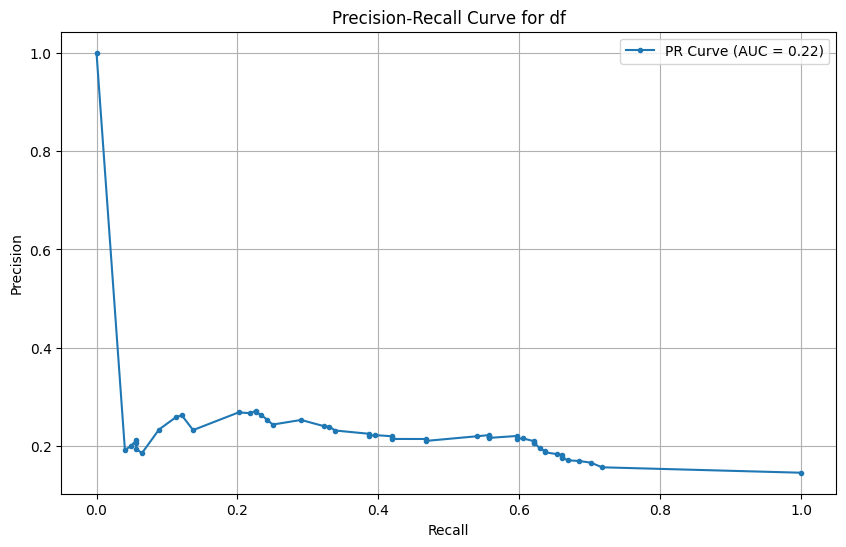

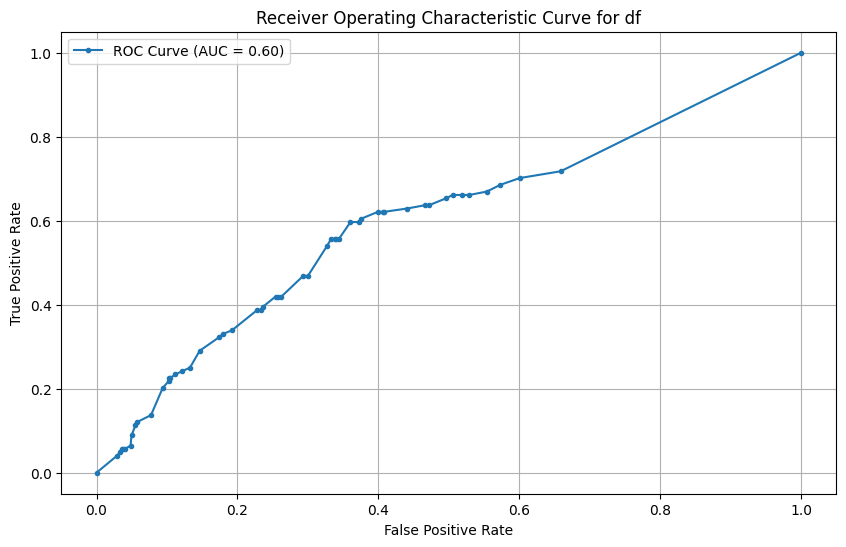

Accuracy for df: 0.78
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       724
         1.0       0.24      0.25      0.25       124

    accuracy                           0.78       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.78      0.78      0.78       848



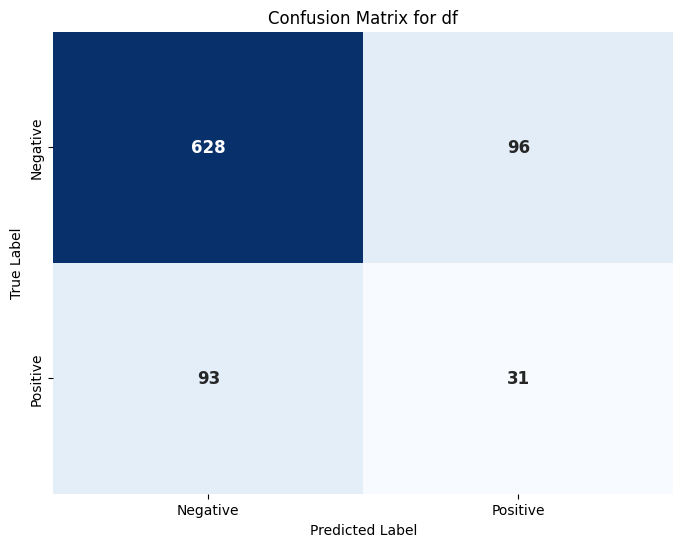

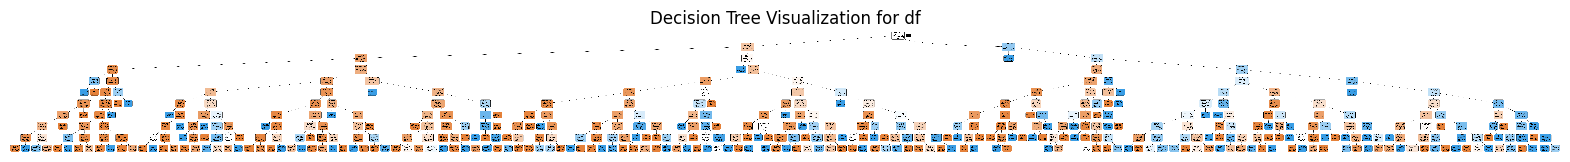

Optimal parameters: {'criterion': 'gini', 'max_depth': 9}


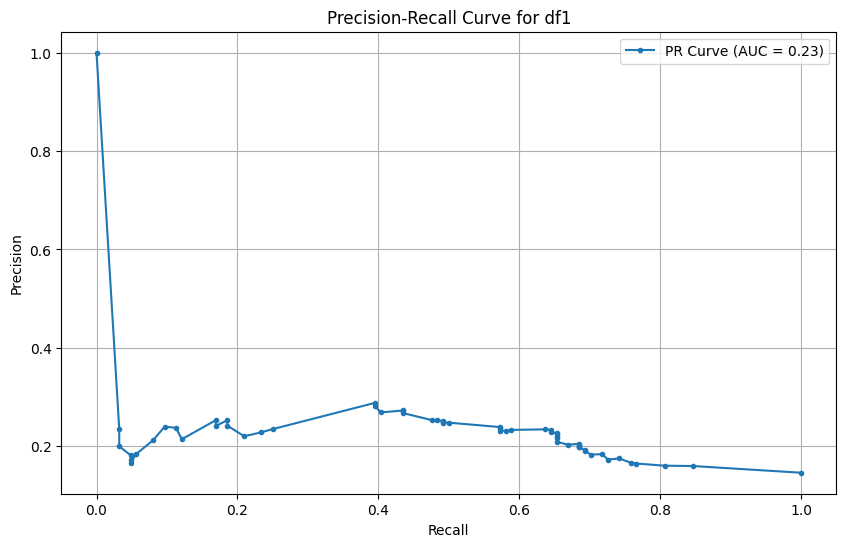

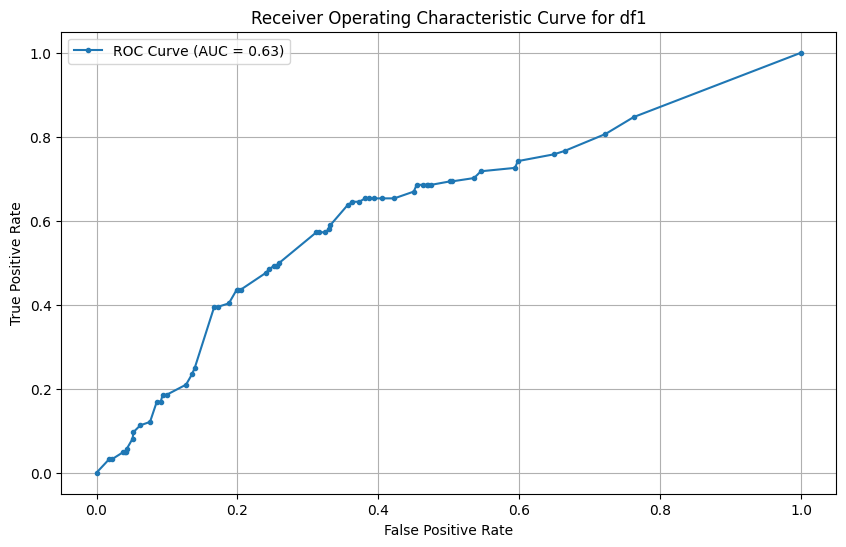

Accuracy for df1: 0.75
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       724
         1.0       0.27      0.40      0.32       124

    accuracy                           0.75       848
   macro avg       0.58      0.61      0.59       848
weighted avg       0.80      0.75      0.77       848



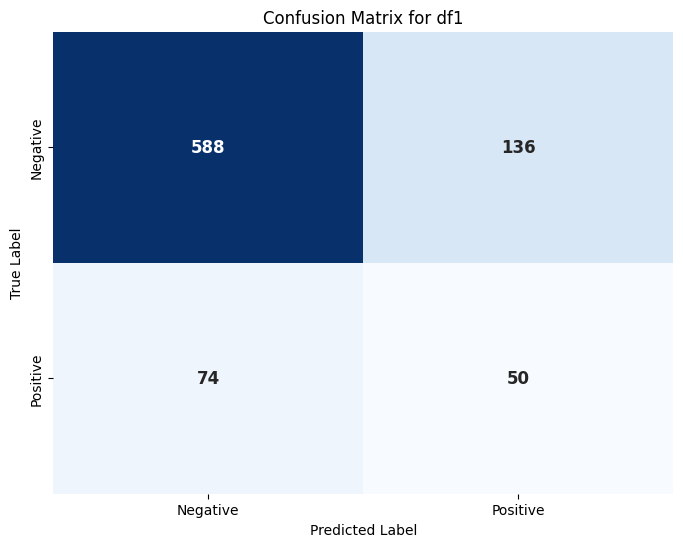

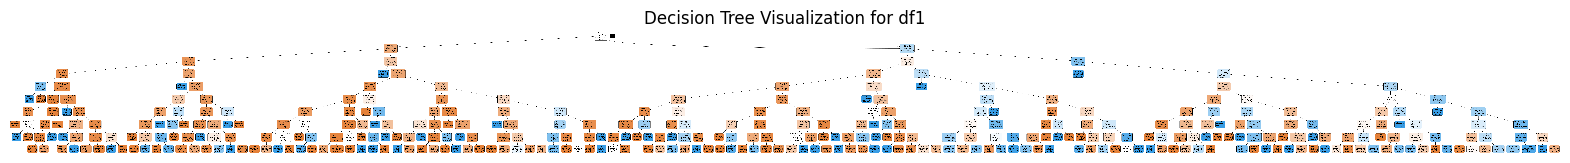

Optimal parameters: {'criterion': 'gini', 'max_depth': 10}


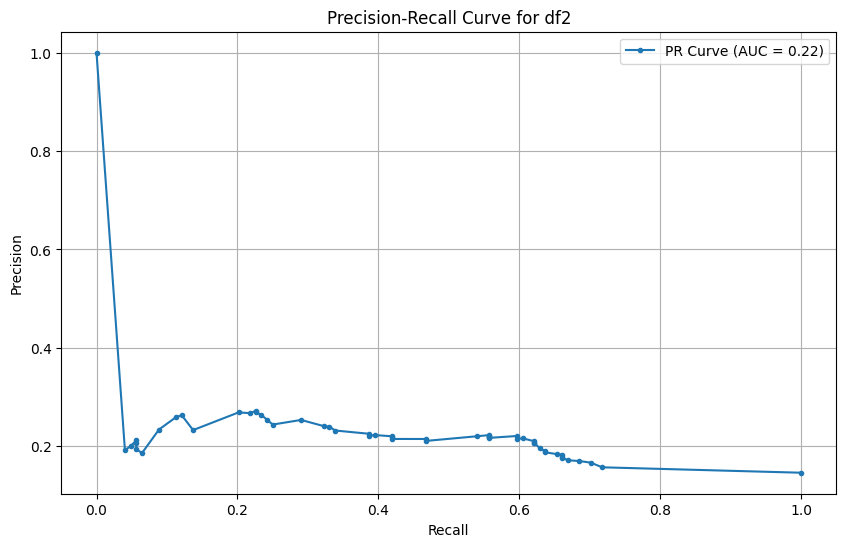

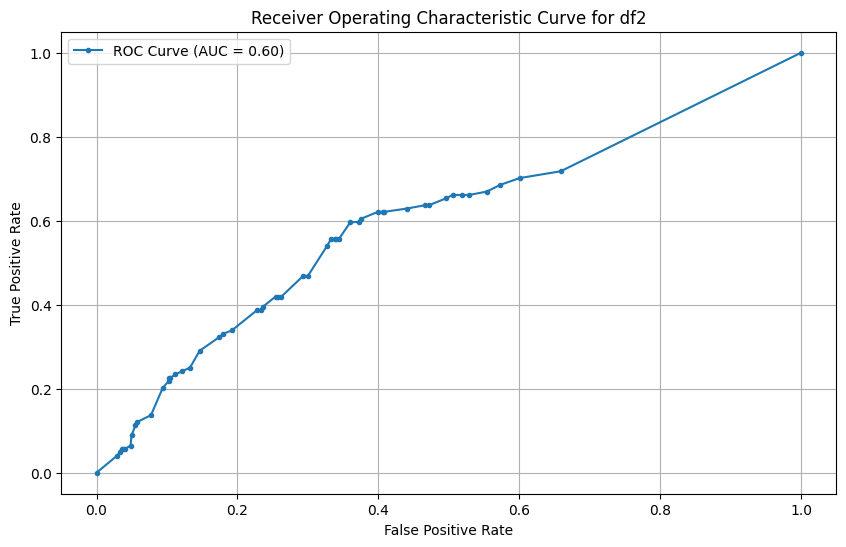

Accuracy for df2: 0.78
Classification Report for df2:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       724
         1.0       0.24      0.25      0.25       124

    accuracy                           0.78       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.78      0.78      0.78       848



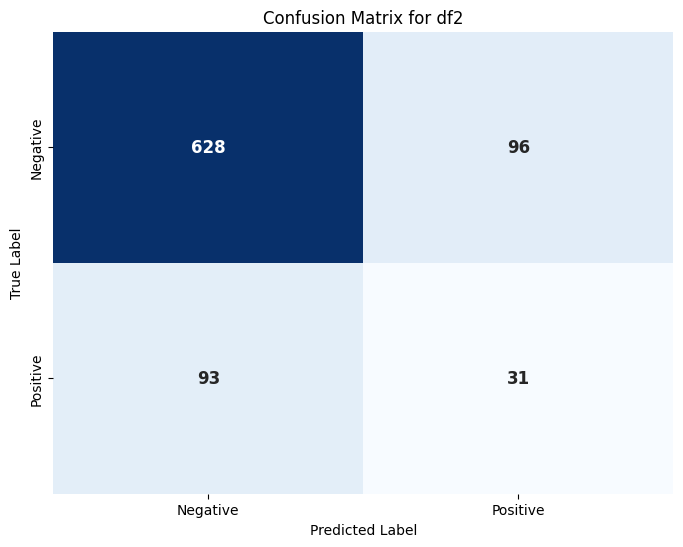

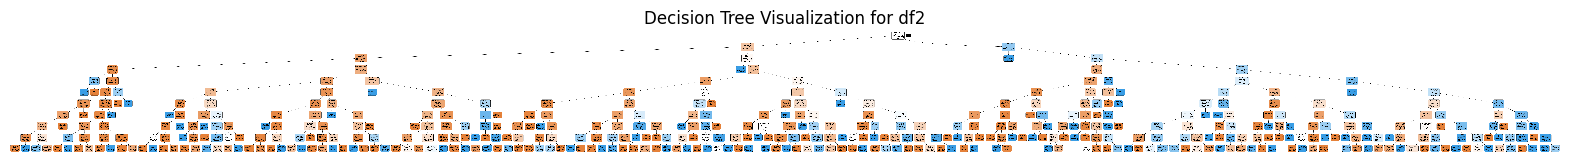

In [141]:
def evaluate_decision_tree(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define the hyperparameter grid
    param_grid = {'max_depth': range(3, 11), 'criterion': ['gini', 'entropy']}

    # Initialize StratifiedKFold
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize GridSearchCV with cross-validation and ROC AUC as the scoring metric
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring=make_scorer(average_precision_score), cv=stratified_k_fold)

    # Fit the classifier on the training data
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    print(f'Optimal parameters: {best_params}')
    best_decisiontree = grid_search.best_estimator_

    # Get the predicted probabilities for the positive class
    y_scores = best_decisiontree.predict_proba(X_test)[:, 1]

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)

    # Calculate ROC values
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_scores)

    # Calculate accuracy
    y_pred = best_decisiontree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)


    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report) 

    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

    # Visualize the Decision Tree
    dot_data = StringIO()
    filename = f"{dataset_label}_tree.png"
    feature_names = X.columns
    target_names = y.unique().astype(str)

    export_graphviz(best_decisiontree, out_file=dot_data, 
                    feature_names=feature_names, 
                    class_names=target_names,
                    filled=True, rounded=True, 
                    special_characters=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    
    img = mpimg.imread(filename)
    plt.figure(figsize=(20, 20))
    plt.imshow(img, interpolation='nearest')
    plt.title(f'Decision Tree Visualization for {dataset_label}')
    plt.axis('off')
    plt.show()

# Dataset labels and data
datasets = {
    'df': (df, 'TenYearCHD'),
    'df1': (df1, 'TenYearCHD'),
    'df2': (df2, 'TenYearCHD'),
}

# Iterate through each dataset, perform decision tree classification with SMOTE, scaling, plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_decision_tree(X, y, label)


# Random Forest

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 

PR AUC for df: 0.24


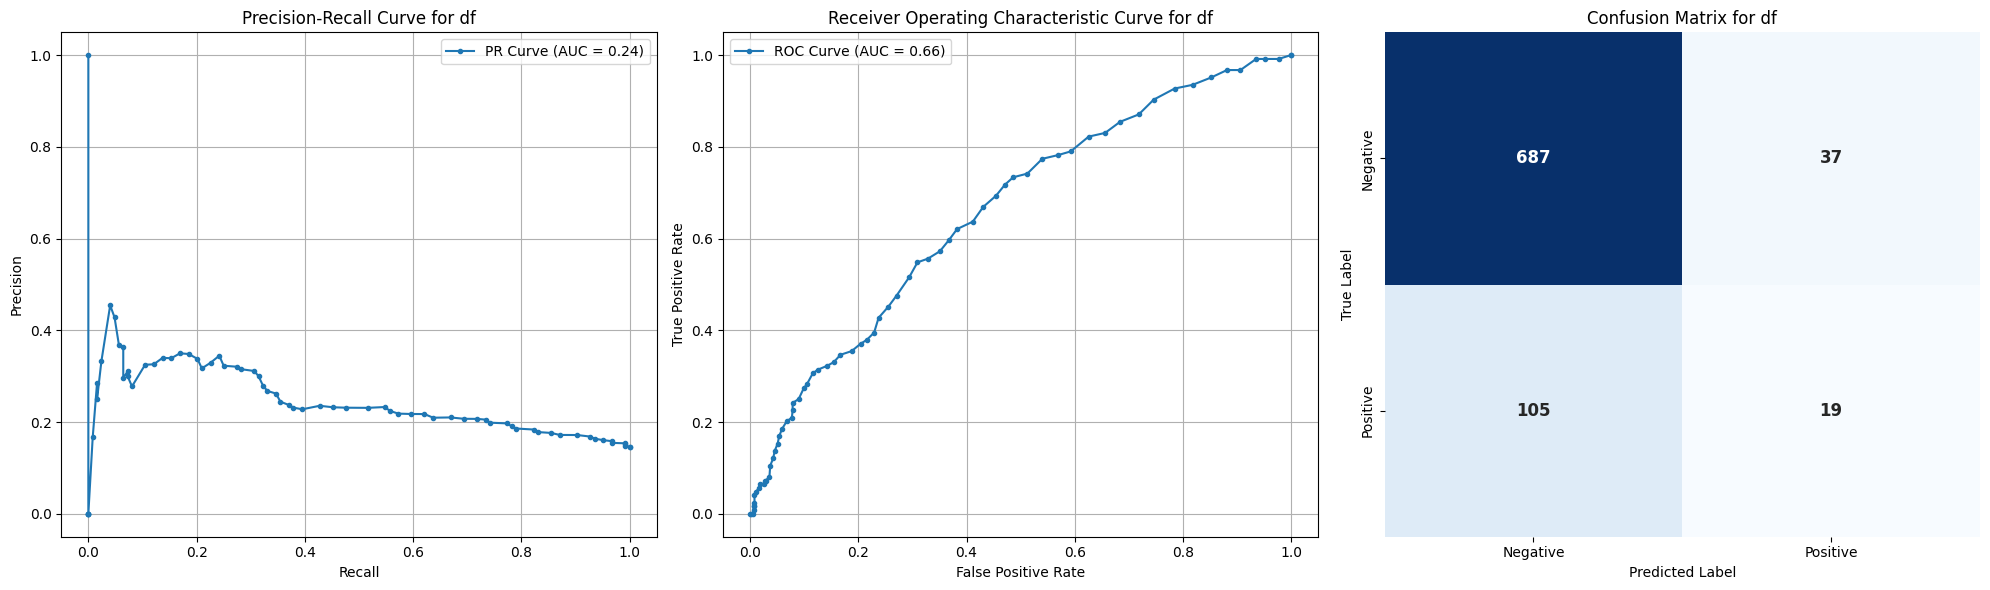

Accuracy for df: 0.83
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       724
         1.0       0.34      0.15      0.21       124

    accuracy                           0.83       848
   macro avg       0.60      0.55      0.56       848
weighted avg       0.79      0.83      0.80       848

PR AUC for df1: 0.25


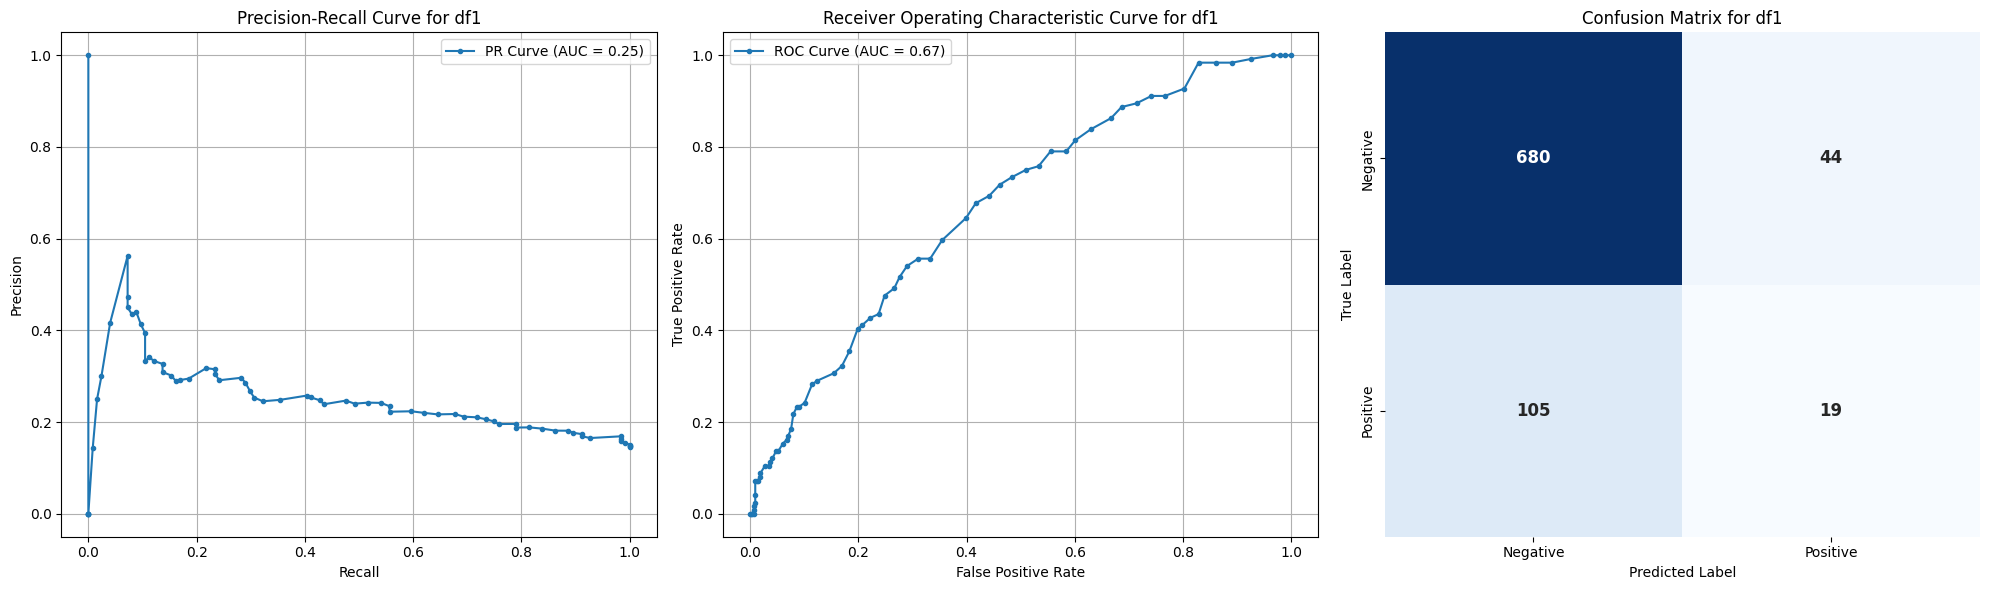

Accuracy for df1: 0.82
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       724
         1.0       0.30      0.15      0.20       124

    accuracy                           0.82       848
   macro avg       0.58      0.55      0.55       848
weighted avg       0.78      0.82      0.80       848

PR AUC for df2: 0.24


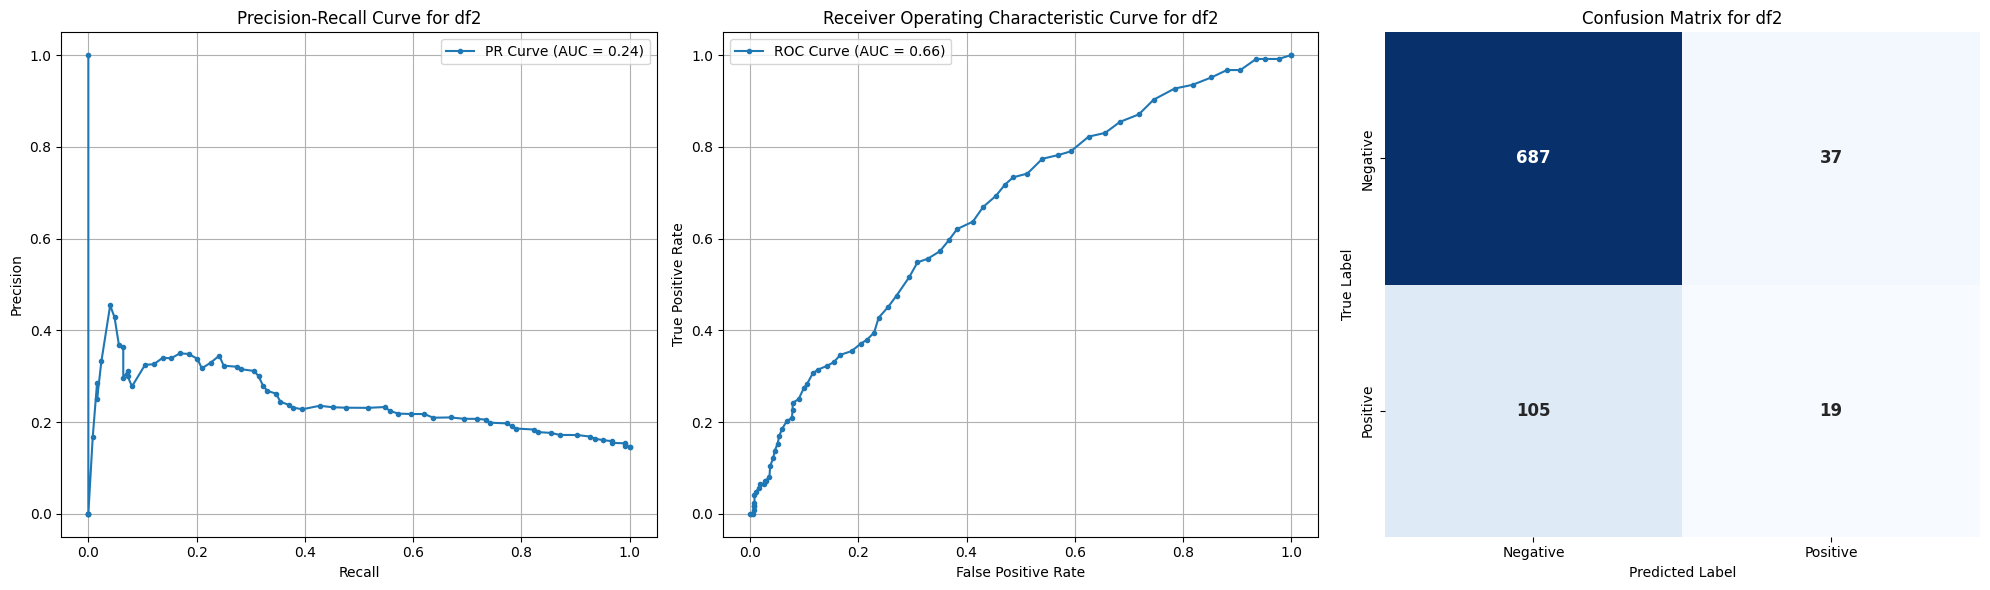

Accuracy for df2: 0.83
Classification Report for df2:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       724
         1.0       0.34      0.15      0.21       124

    accuracy                           0.83       848
   macro avg       0.60      0.55      0.56       848
weighted avg       0.79      0.83      0.80       848



In [143]:
def evaluate_random_forest(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize the RandomForest classifier
    random_forest = RandomForestClassifier(random_state=42)

    # Fit the classifier on the training data
    random_forest.fit(X_train_resampled, y_train_resampled)

    # Get the predicted probabilities for the positive class
    y_scores = random_forest.predict_proba(X_test)[:, 1]

    # Calculate precision and recall values
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC for {dataset_label}: {pr_auc:.2f}')

    # Calculate ROC values
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_scores)

    # Calculate accuracy
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Plot the PR curve
    axes[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')
    axes[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    axes[0].legend()
    axes[0].grid(True)

    # Plot the ROC curve
    axes[1].plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'Receiver Operating Characteristic Curve for {dataset_label}')
    axes[1].legend()
    axes[1].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=axes[2])
    axes[2].set_title(f'Confusion Matrix for {dataset_label}')
    axes[2].set_xlabel('Predicted Label')
    axes[2].set_ylabel('True Label')
    axes[2].set_xticks([0.5, 1.5])
    axes[2].set_xticklabels(['Negative', 'Positive'])
    axes[2].set_yticks([0.5, 1.5])
    axes[2].set_yticklabels(['Negative', 'Positive'])

    plt.tight_layout()
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)

# Dataset labels and data (assuming df, df1, df2 are defined as before)
datasets = {
    'df': (df, 'TenYearCHD'),
    'df1': (df1, 'TenYearCHD'),
    'df2': (df2, 'TenYearCHD'),
}

# Iterate through each dataset, perform Random Forest classification with SMOTE, scaling,
# plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_random_forest(X, y, label)


# SVM

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling

Best parameters found for df: {'kernel': 'rbf'}


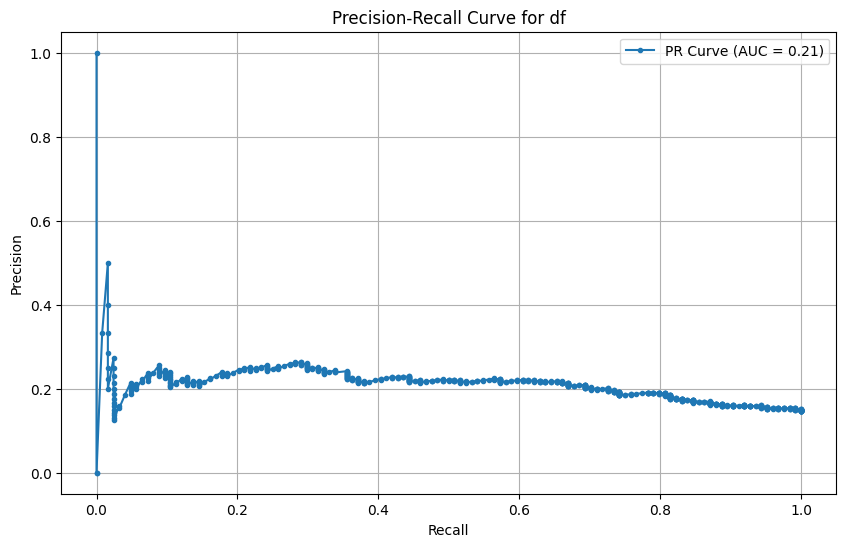

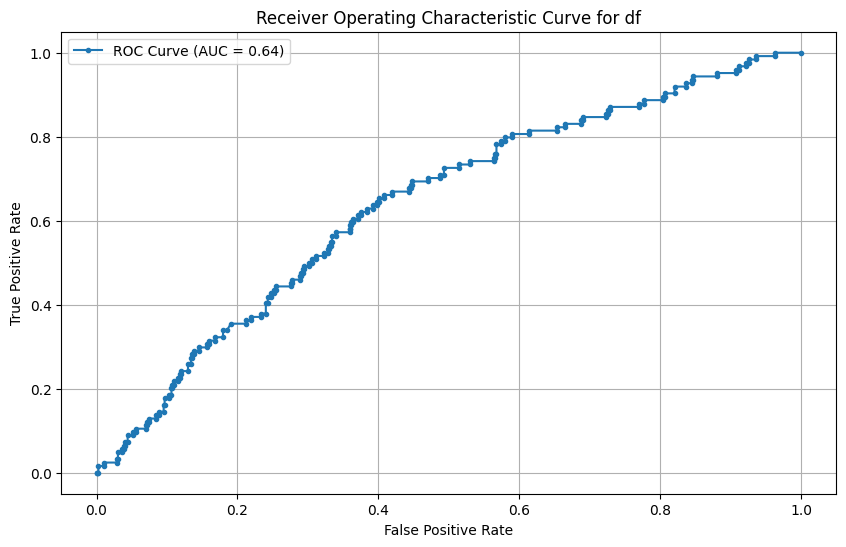

Accuracy for df: 0.75
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85       724
         1.0       0.24      0.35      0.28       124

    accuracy                           0.75       848
   macro avg       0.56      0.58      0.56       848
weighted avg       0.79      0.75      0.76       848



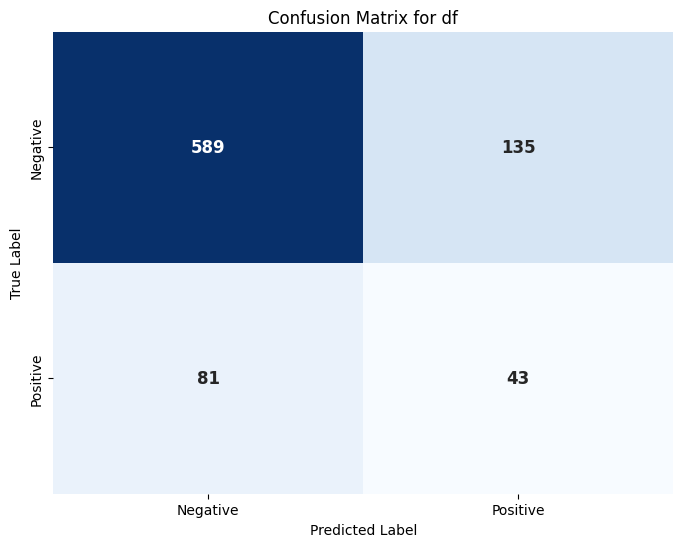

Best parameters found for df1: {'kernel': 'rbf'}


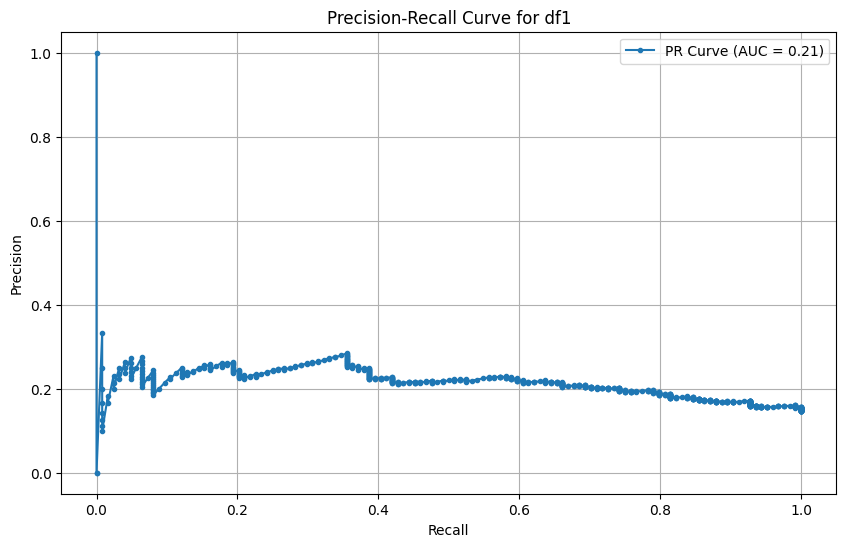

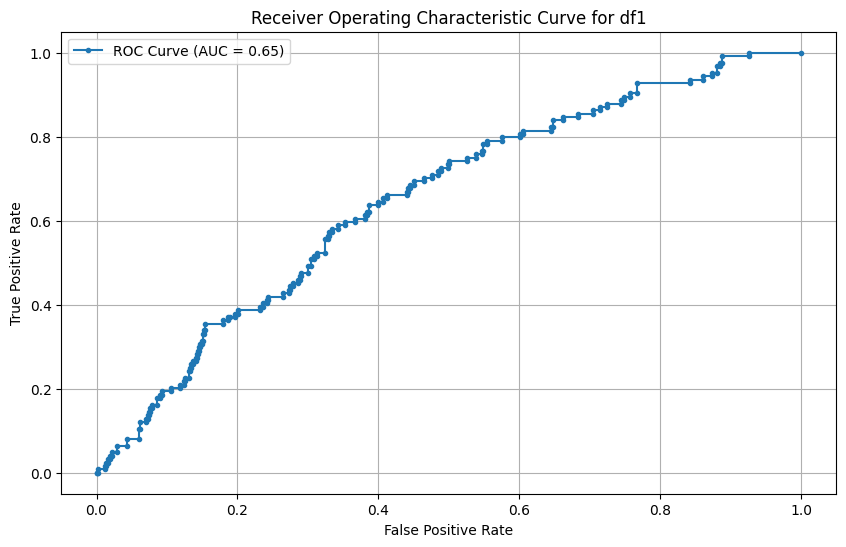

Accuracy for df1: 0.74
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       724
         1.0       0.25      0.37      0.30       124

    accuracy                           0.74       848
   macro avg       0.56      0.59      0.57       848
weighted avg       0.79      0.74      0.76       848



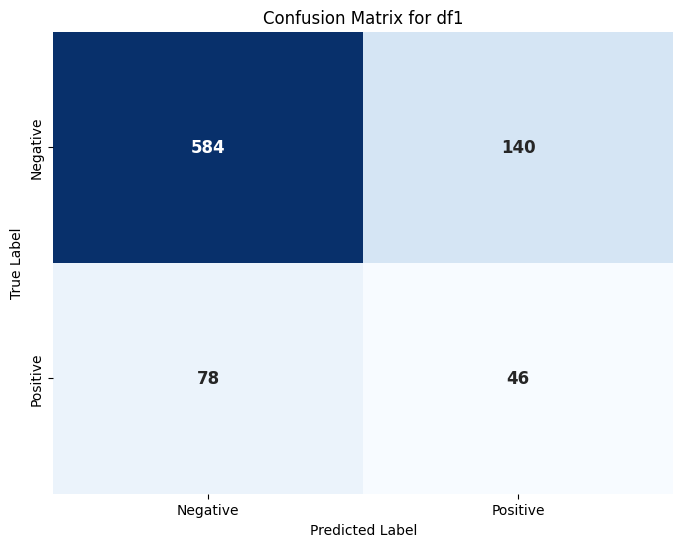

Best parameters found for df2: {'kernel': 'rbf'}


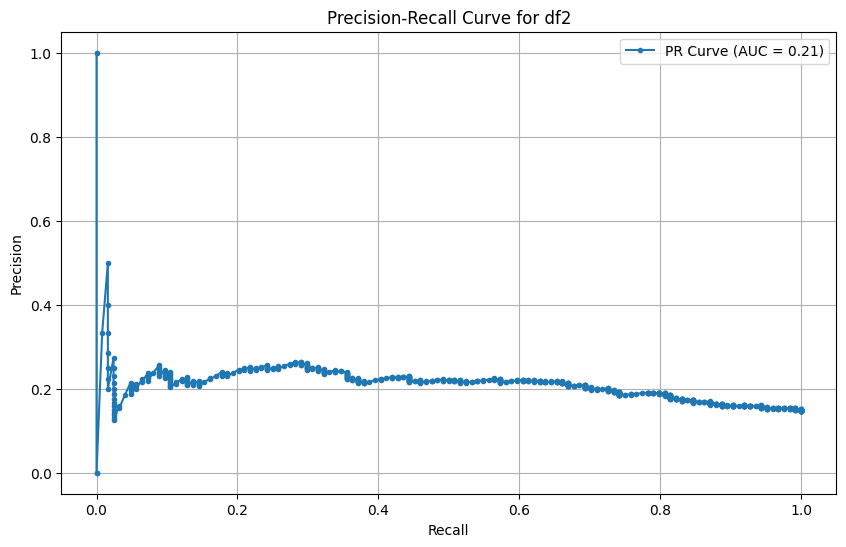

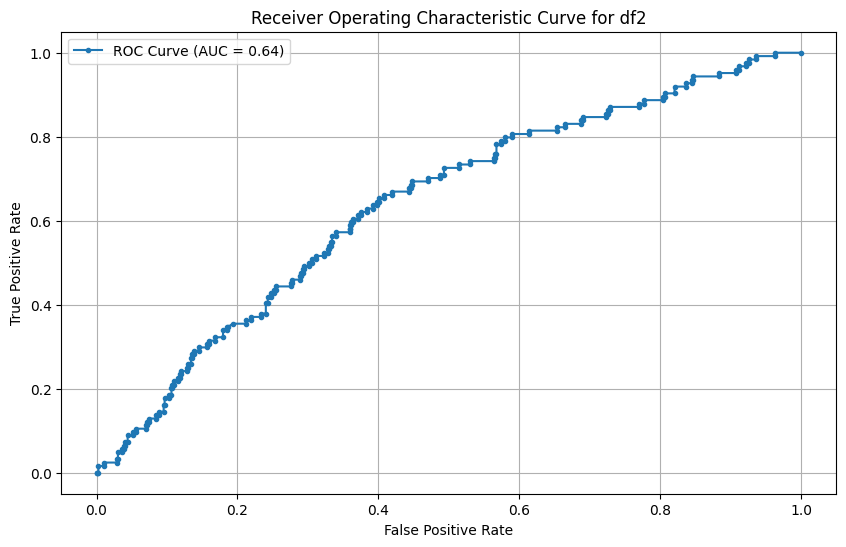

Accuracy for df2: 0.75
Classification Report for df2:
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85       724
         1.0       0.24      0.35      0.28       124

    accuracy                           0.75       848
   macro avg       0.56      0.58      0.56       848
weighted avg       0.79      0.75      0.76       848



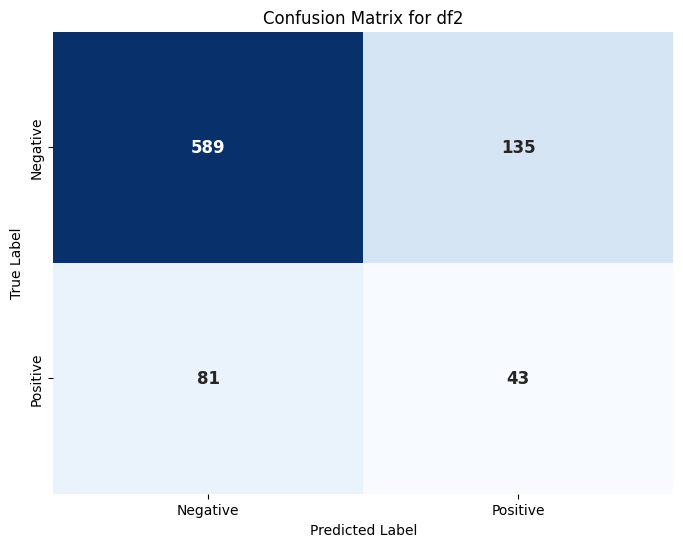

In [145]:

def evaluate_svm(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM classifier
    svm_clf = SVC(C = 1.0, probability=True)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

    # Perform Grid Search to find the best parameters
    grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train_resampled)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print(f'Best parameters found for {dataset_label}: {best_params}')

    # Use best parameters to train SVM
    best_svm_clf = SVC(**best_params, probability=True)
    best_svm_clf.fit(X_train_scaled, y_train_resampled)

    # Fit the classifier on the scaled training data
    best_svm_clf.fit(X_train_scaled, y_train_resampled)

    # Get the predicted probabilities for the positive class
    y_scores = best_svm_clf.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)

    # Calculate ROC values
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_scores)

    # Calculate accuracy
    y_pred = best_svm_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)

    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Dataset labels and data
datasets = {
    'df': (df, 'TenYearCHD'),
    'df1': (df1, 'TenYearCHD'),
    'df2': (df2, 'TenYearCHD'),
}

# Iterate through each dataset, perform svm classification with SMOTE, scaling, plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_svm(X, y, label)
